# QUANTUM CRYPTOGRAPHY USING BB84 QUANTUM KEY DISTRIBUTION PROTOCOL

Pamela Pajarillo 

Introduction to Quantum Computing - Physics 488

Qiskit Final Project

May 6, 2019

# Introduction

Quantum cryptography enables two parties, the sender is traditionally called Alice and the receiver is traditionally called Bob, to exchange information. If an eavesdropper, traditionally called Eve, tries to intercept the messages, her presence is detected by an unavoidable disturbance she causes by trying to access the information. 
The difference between classical and quantum cryptography is classical information can be copied, making it vulnerable for adversaries to intercept and decrypt the message. Quantum information cannot be cloned, and this is due to the no-cloning theorem. This project goes over the implementation of the BB84 Quantum Key Distribution Protocol using IBM's Qiskit. The BB84 Quantum Key Distribution Protocol is similar to the One Time Pad, which requires the use of a one-time pre-shard key which is the same size or longer than the message being sent. We will use the Aer Backend, which is a quantum computer simulator, and IBM's 14 Q Melbourne Quantum Computer, which is a 14 qubit quantum device at IBM in Melbourne, to demonstrate the BB84 Quantum Key Distribution .

# Overview and Procedure

The BB84 Quantum Key Distribution Protocol is a four-state protocol where Alice and Bob uses two sets of orthonormal bases to establish a key. 

Alice and Bob will use a key that is made up of a string of 0's and 1's. Alice sends qubits to Bob, and the qubit is in one of four states:

$$ \{\left| 0 \right\rangle, \left| 1 \right\rangle \}, \{\left| +x \right\rangle, \left| -x \right\rangle \} $$ 

where $\left| \pm x \right\rangle = \frac{1}{\sqrt{2}}(\left| 0 \right\rangle \pm \left| 1 \right\rangle)$. Let $\left| 0 \right\rangle$ and $\left| +x \right\rangle$ correspond to the string "0", and $\left| 1 \right\rangle$ and $\left| -x \right\rangle$ correspond to the string "1". Alice decides which state to send at random. When Bob receives the qubit, he measures it in one of the two bases, and the bases he chose is random. If he uses the same basis as the one Alice chose, he will obtain the same state Alice sent. After measuring a qubit, Bob annouces to the public which basis he used, but not the result of the measurement. If they agree, they keep the string that corresponds to that state, and if they disagree, they throw out that bit. 



We will list out the procedure we will take to illustrate the BB84 Quantum Key Distribution Protocol in QisKit. We will use the same procedures when running on the Aer Backend and on the IBM 14 Q Melbourne Quantum Computer.

## Procedure for BB84 Quantum Key Distribution Protocol Between Alice and Bob


1.   Alice chooses a message to send to Bob. In this project, we will let Alice send the message "vlq" to Bob.
2.   Alice creates a random key. She will create a random 14 character key, and this is because we will be running on a 14 qubit quantum computer. To create a random key, she will randomly add in Hadamard gates to any of the 14 qubits and measure the result. This result is Alice's key. 
1.   Now, Alice wants to send the qubits which correspond to the key. She randomly chooses which basis and a state from that basis. This is represented by the placement of random Pauli X gates and the random Hadamard gates. Alice sends all 14 qubits to Bob.
2.   Bob receives the qubit, and Bob measures it in one of the two bases, choosing which basis to measure at random.  
1.   After measuring a qubit, Bob announces to the public which basis he used, but not the result of the measurement. Alice then tells Bob whether the basis he used was the same as the one she chose. If they agree on the basis, they keep the result corresponding to that qubit. If they disagree, they throw out that bit. Each of them should now have a key. They should be the same in order for Alice and Bob to be able to secretly communicate.
2.   Alice encodes her message using the key that they established after announcing the bases. She sends the encoded message to Bob.
1.   Bob receives the encoded message from Alice. He uses the key he made to decode the message.

This procedure is used for the Aer backend and the IBM 14 Q Melbourne Quantum Computer.


















## Procedure for Introducing Eve the Eavesdropper 

1.   Eve intercepts Alice's transmission of the key. She measures the qubits, however, she doesn't know what basis to measure them in, so she guesses.
1.   After Eve measures, she prepares a qubit to send to Bob based on the results. 
2.   Bob receives the qubits and measures it with his randomly chosen basis.
1.  After measuring a qubit, Bob announces to the public which basis he used, but not the result of the measurement. Alice then tells Bob whether the basis he used was the same as the one she chose.
2.   Alice and Bob suspect an eavesdropper. To check for an eavesdropper, they publish some of the results of their key that they should agree on. If Alice and Bob agree on all of them, then they did not detect Eve's presence. If there is a discrepancy on any of their results that they should agree on, then this means Alice and Bob detects Eve's presence, which mean that their transmission is insecure and they should throw out all their results and start over. 


This procedure is used for the Aer backend and the IBM 14 Q Melbourne Quantum Computer.

# **Installation of Qiskit and Importing Useful Python Packages**
The very first thing we need to do is to install Qiskit and import useful Python packages we will use throughout the project. We will also get the Aer backend and the backend of the IBM Q 14 Melbourne Quantum Computer.

In [ ]:
# Install Qiskit
!pip install qiskit qiskit-aqua qiskit-chemistry
!pip install qiskit-terra[visualization]

In [ ]:
# Import python packages
import math
import matplotlib.pyplot as plt
import numpy as np  
import time

# begin with importing QISKIT
import qiskit as qk
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import QuantumCircuit, execute, BasicAer, IBMQ
from qiskit import compile
from qiskit.tools.visualization import plot_histogram
APITOKEN = 'INSERT API TOKEN'
IBMQ.save_account('INSERT API TOKEN')

# Getting Aer backend and IBM's Backend
IBMQ.enable_account(APITOKEN)
IBMQ.load_accounts()
IBMQ.backends()
backend = BasicAer.get_backend('qasm_simulator')
backend_ibm = IBMQ.get_backend('ibmq_16_melbourne')

# BB84 Quantum Key Distribution Protocol Between Alice and Bob Using Aer Backend


## Step 1: Alice Chooses a Message to Send to Bob

Let's say Alice wants to send the message "vlq" to Bob, which contains 3 characters. We will create the random key, and the random key must be the same length or longer than the message Alice wants to send. In this example, we will use a key that is at least three times greater than the length of the message. We used a short message (3 characters) so we can run this on the 14-qubit IBM Q device. 

In [ ]:
# Alice wants to send a message
message = "vlq"
len_mes = len(message)
key_size = 14

print('Alice wants to send: ', message)
print('Length of message Alice wants to send: ', len_mes)
print('Length of key: ', key_size)

Alice wants to send:  vlq
Length of message Alice wants to send:  3
Length of key:  14


## Step 2: Alice Creates a Random Key

The code below sets up the random key and this is represented with a quantum circuit. The circuit below is the initial setup of the 14 qubit circuit.

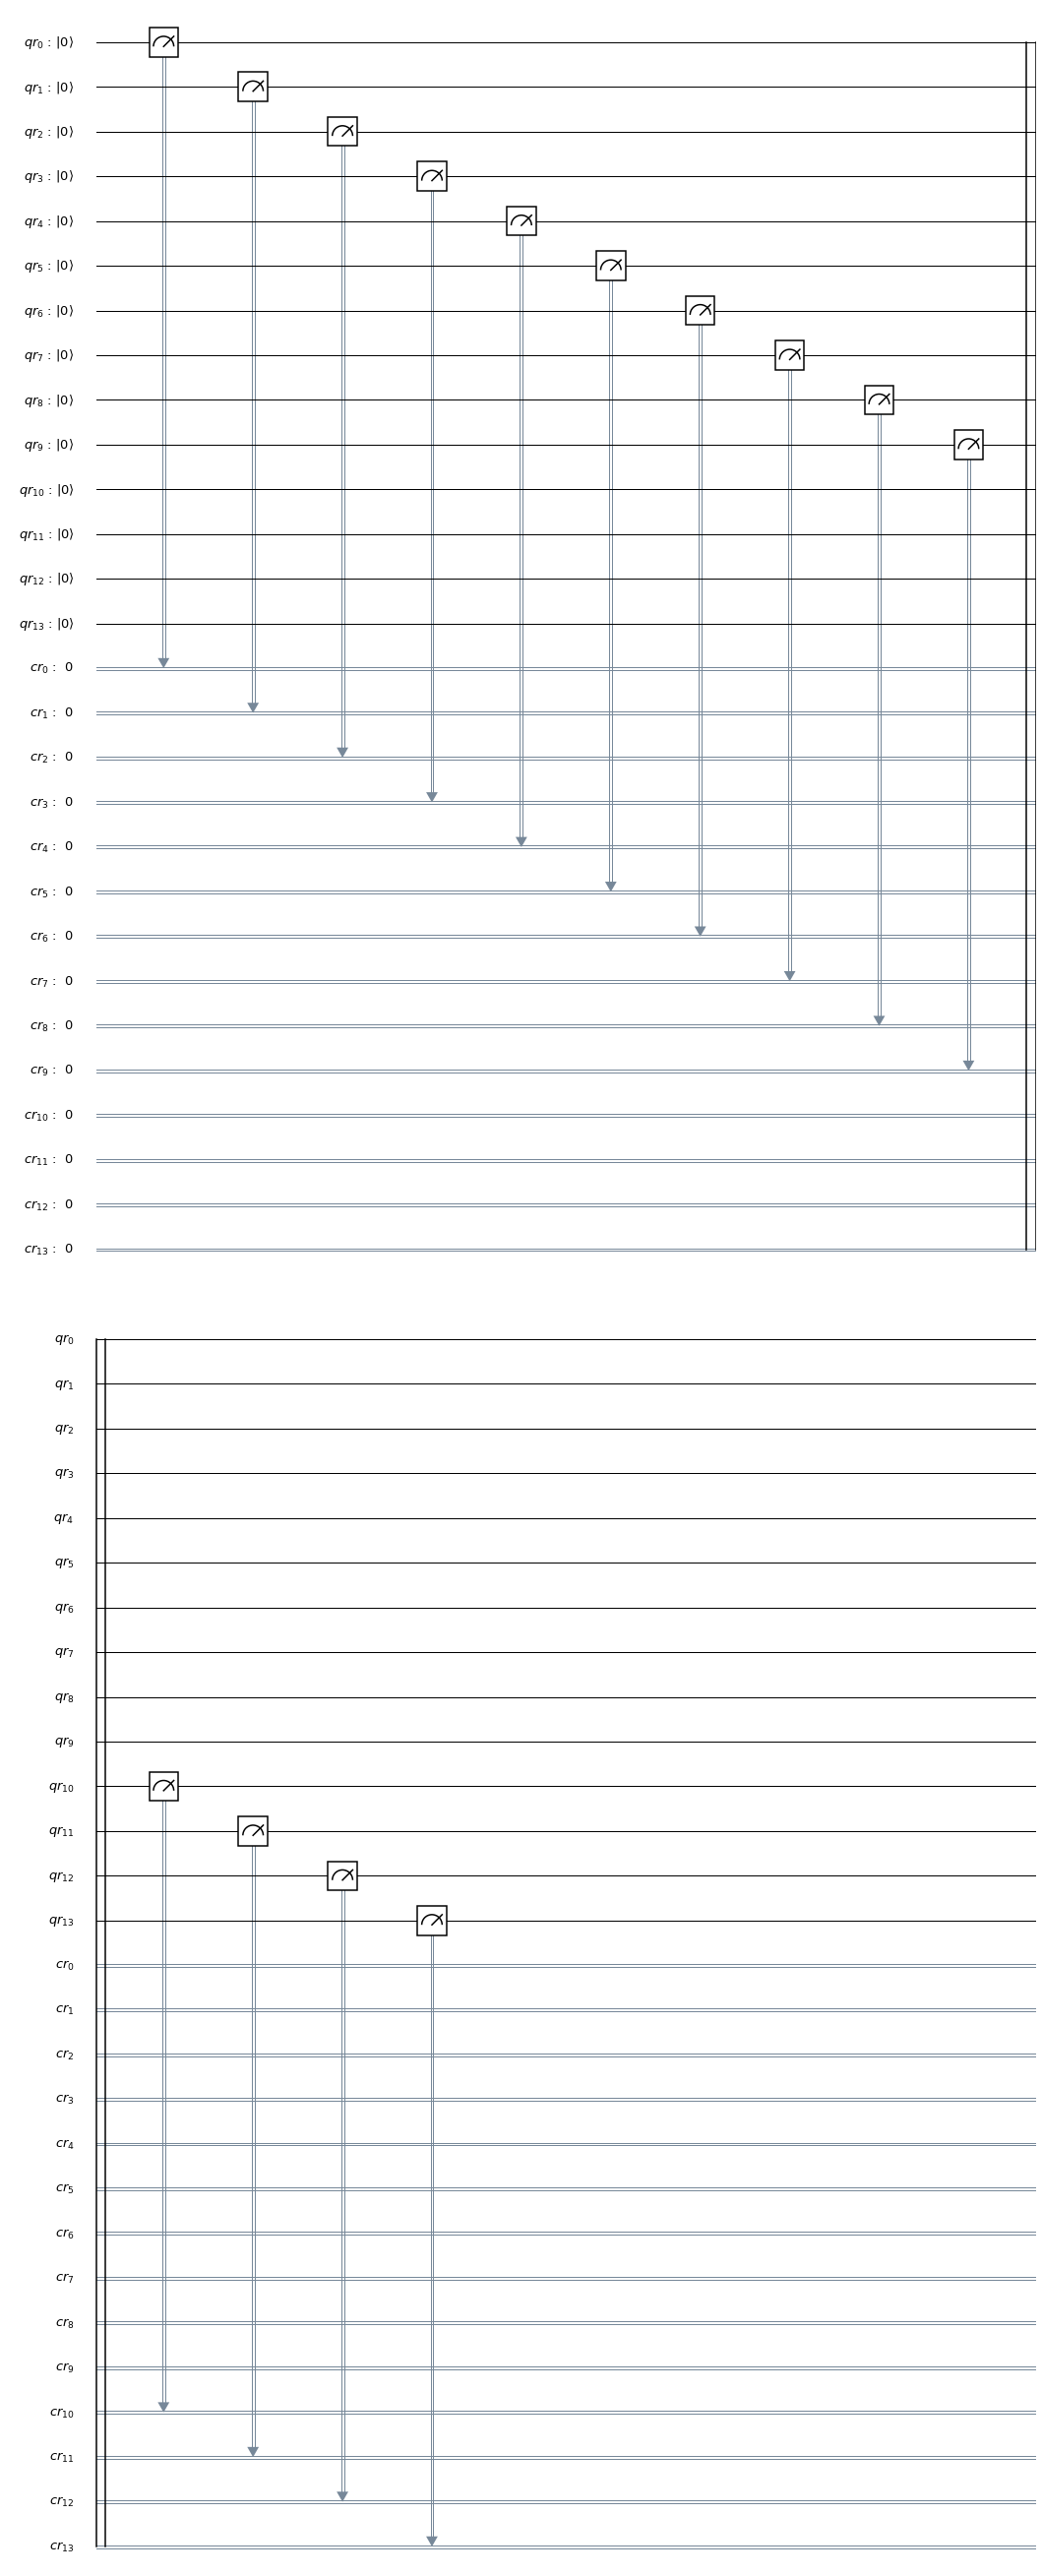

In [ ]:
# The key Bob and Alice will use
key = ''
backend = BasicAer.get_backend('qasm_simulator')  

temp_out = ''

qr_alice = QuantumRegister(key_size, name='qr')
cr_alice = ClassicalRegister(key_size, name='cr')
qc_alice = QuantumCircuit(qr_alice,cr_alice, name='qc')

qr_meas1_alice = QuantumRegister(key_size, name='qr')
cr_meas1_alice = ClassicalRegister(key_size, name='cr')
qc_meas1_alice = QuantumCircuit(qr_meas1_alice,cr_meas1_alice, name='qc')

qr_meas2_alice = QuantumRegister(key_size, name='qr')
cr_meas2_alice = ClassicalRegister(key_size, name='cr')
qc_meas2_alice = QuantumCircuit(qr_meas2_alice,cr_meas2_alice, name='qc')

qc_meas1_alice.measure(qr_meas1_alice,cr_meas1_alice)
qc_meas1_alice.draw(output = 'mpl')



> **Figure 1: ** Initialization of the 14-Qubit Circuit. In the next step we will randomly switch qubits to the x basis, which is will be shown with a Hadamard gate. 





Now we randomly switch qubits. The code below switches the qubits, using numpy's function of generating random numbers between 0 and 1. If the random number generates a number less than 0.5, we switch the qubit the  $ \{\left| +x \right\rangle, \left| -x \right\rangle \} $ basis. This is represented by the Hadamard gate shown in the circuit below. After measuring the qubits in the circuit below, the results will be Alice's key. 



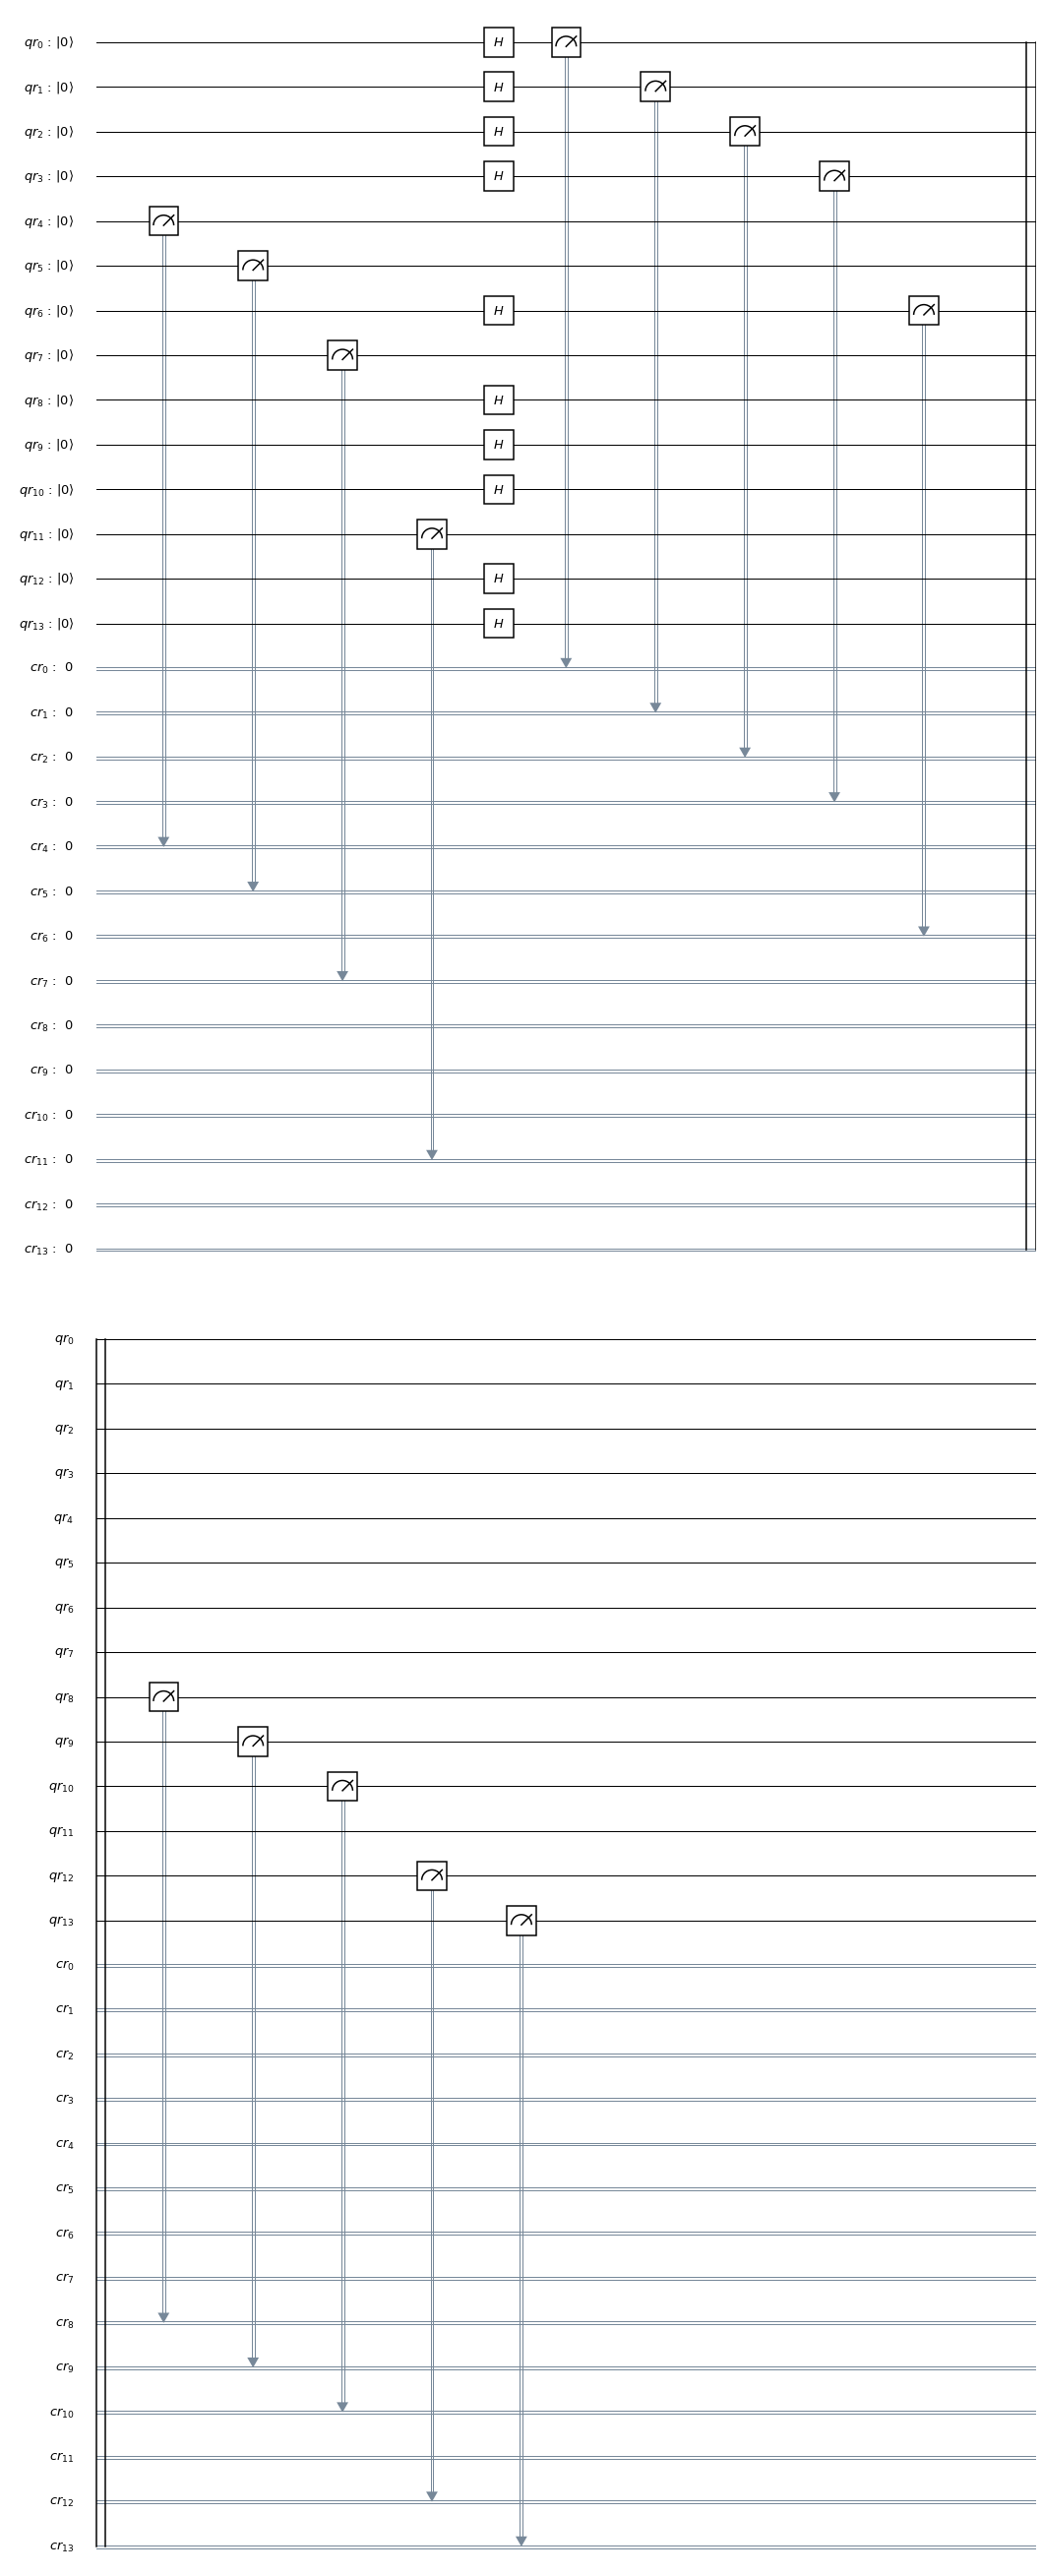

In [ ]:
# randomly switch qubits to superpositions -> |+x> or |-x>
for i in range(key_size):
  # Use numpy's random generator to see whether to create superposition
  if (np.random.random() < 0.5):
    qc_alice.h(qr_alice[i])
    qc_alice.measure(qr_alice[i],cr_alice[i])
    qc_meas2_alice.h(qr_meas2_alice[i])
    qc_meas2_alice.measure(qr_meas2_alice[i],cr_meas2_alice[i])
  else: 
    qc_alice.measure(qr_alice[i],cr_alice[i])
    qc_meas2_alice.measure(qr_meas2_alice[i],cr_meas2_alice[i])

qc_meas2_alice.draw(output = 'mpl')



> **Figure 2: ** 14-Qubit Circuit with Random Hadamard Gates. We randomly switch some qubit by using the Hadamard gate, which creates a superposition. The results for all qubits is Alice's key.



Now we will send this circuit to the Aer backend. Once executed, we can get the state of each qubit in the quantum circuit, and the results will be our key. So this key was randomly generated. This is shown below.

In [ ]:
result_alice = execute(qc_alice, backend, shots=1).result()
counts_alice = result_alice.get_counts(qc_alice)
result_key = list(counts_alice.keys())
temp_out = result_key[0]
key += temp_out

key = key[:key_size]
print('Alice\'s key', key)
print('Length of Alice\'s key: ', len(key))

Alice's key 11011101001011
Length of Alice's key:  14


## Step 3: Alice Sends Qubits Corresponding to the Key to Bob

Alice chooses a random bases to measure each of the 14 qubits in. We also will create the bases Bob will measure the qubit once he receives the qubit from Alice. This random choice of bases was due to numpy's random number generator between zero and one. If the number generated is less than 0.5, then the basis will be $\{\left| 0 \right\rangle, \left| 1 \right\rangle \}$, which we call the z  basis in the code. If the number generated is more than 0.5, then the basis will be , $\{\left| +x \right\rangle, \left| -x \right\rangle \}$, which we call the x basis in the code. The basis measurements for Alice and Bob's are shown below.

In [ ]:
# Generate a string of bases that Alice and Bob will measure in
# Z corresponds to |0>,|1> and X corresponds to |+x>,|-x>
basis_alice = []
basis_bob = []
for i in range(key_size):
  # Use numpy's random generator to see whether to create superposition
  if (np.random.random() < 0.5):
    basis_alice +='X'
  else :
    basis_alice +='Z'
  if (np.random.random() < 0.5):
    basis_bob +='X'
  else :
    basis_bob +='Z'
print('Alice\'s basis measurement for each qubit: ', basis_alice )
print('Bob\'s basis measurement for each qubit: ', basis_bob )

Alice's basis measurement for each qubit:  ['X', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X']
Bob's basis measurement for each qubit:  ['Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z']


Next, Alice turns the random key into corresponding qubit states. If a value in Alice's key is zero, she will prepare a qubit in the $\left| 0 \right\rangle$ state if her randomly chosen basis is "Z" or she will prepare a qubit in the $\left| -x \right\rangle$ state if her randomly chosen basis is "X". This is represented by the X gate in the circuit below, which is the Pauli-X gate. If a value in Alice's key is one, she will prepare a qubit in the $\left| 1 \right\rangle$ state if her randomly chosen basis is "Z" or she will prepare a qubit in the $\left| +x \right\rangle$ state if her randomly chosen basis is "X". If Alice has "X" in her basis measurements from above, the qubit will be in a superposition, and this is represented by the Hadamard gate. Now, Alice sends the qubits to Bob. Bob will randomly select a basis to measure the qubit in, and this was randomly generated above. If Bob has "X" for his basis measurement, he wil rotate the qubis in the opposite direction with a Hadamard gate. Then Bob measures the state of the qubit, which tells him his result. If Bob uses the same basis as the one Alice chose, he will obtain the same state that Alice sent. 

Value of key:  1 Alice's basis:  X Bob's basis:  Z
Value of key:  1 Alice's basis:  X Bob's basis:  Z
Value of key:  0 Alice's basis:  Z Bob's basis:  Z
Value of key:  1 Alice's basis:  X Bob's basis:  X
Value of key:  1 Alice's basis:  Z Bob's basis:  Z
Value of key:  1 Alice's basis:  X Bob's basis:  X
Value of key:  0 Alice's basis:  Z Bob's basis:  Z
Value of key:  1 Alice's basis:  Z Bob's basis:  Z
Value of key:  0 Alice's basis:  X Bob's basis:  X
Value of key:  0 Alice's basis:  X Bob's basis:  X
Value of key:  1 Alice's basis:  X Bob's basis:  X
Value of key:  0 Alice's basis:  X Bob's basis:  X
Value of key:  1 Alice's basis:  Z Bob's basis:  X
Value of key:  1 Alice's basis:  X Bob's basis:  Z


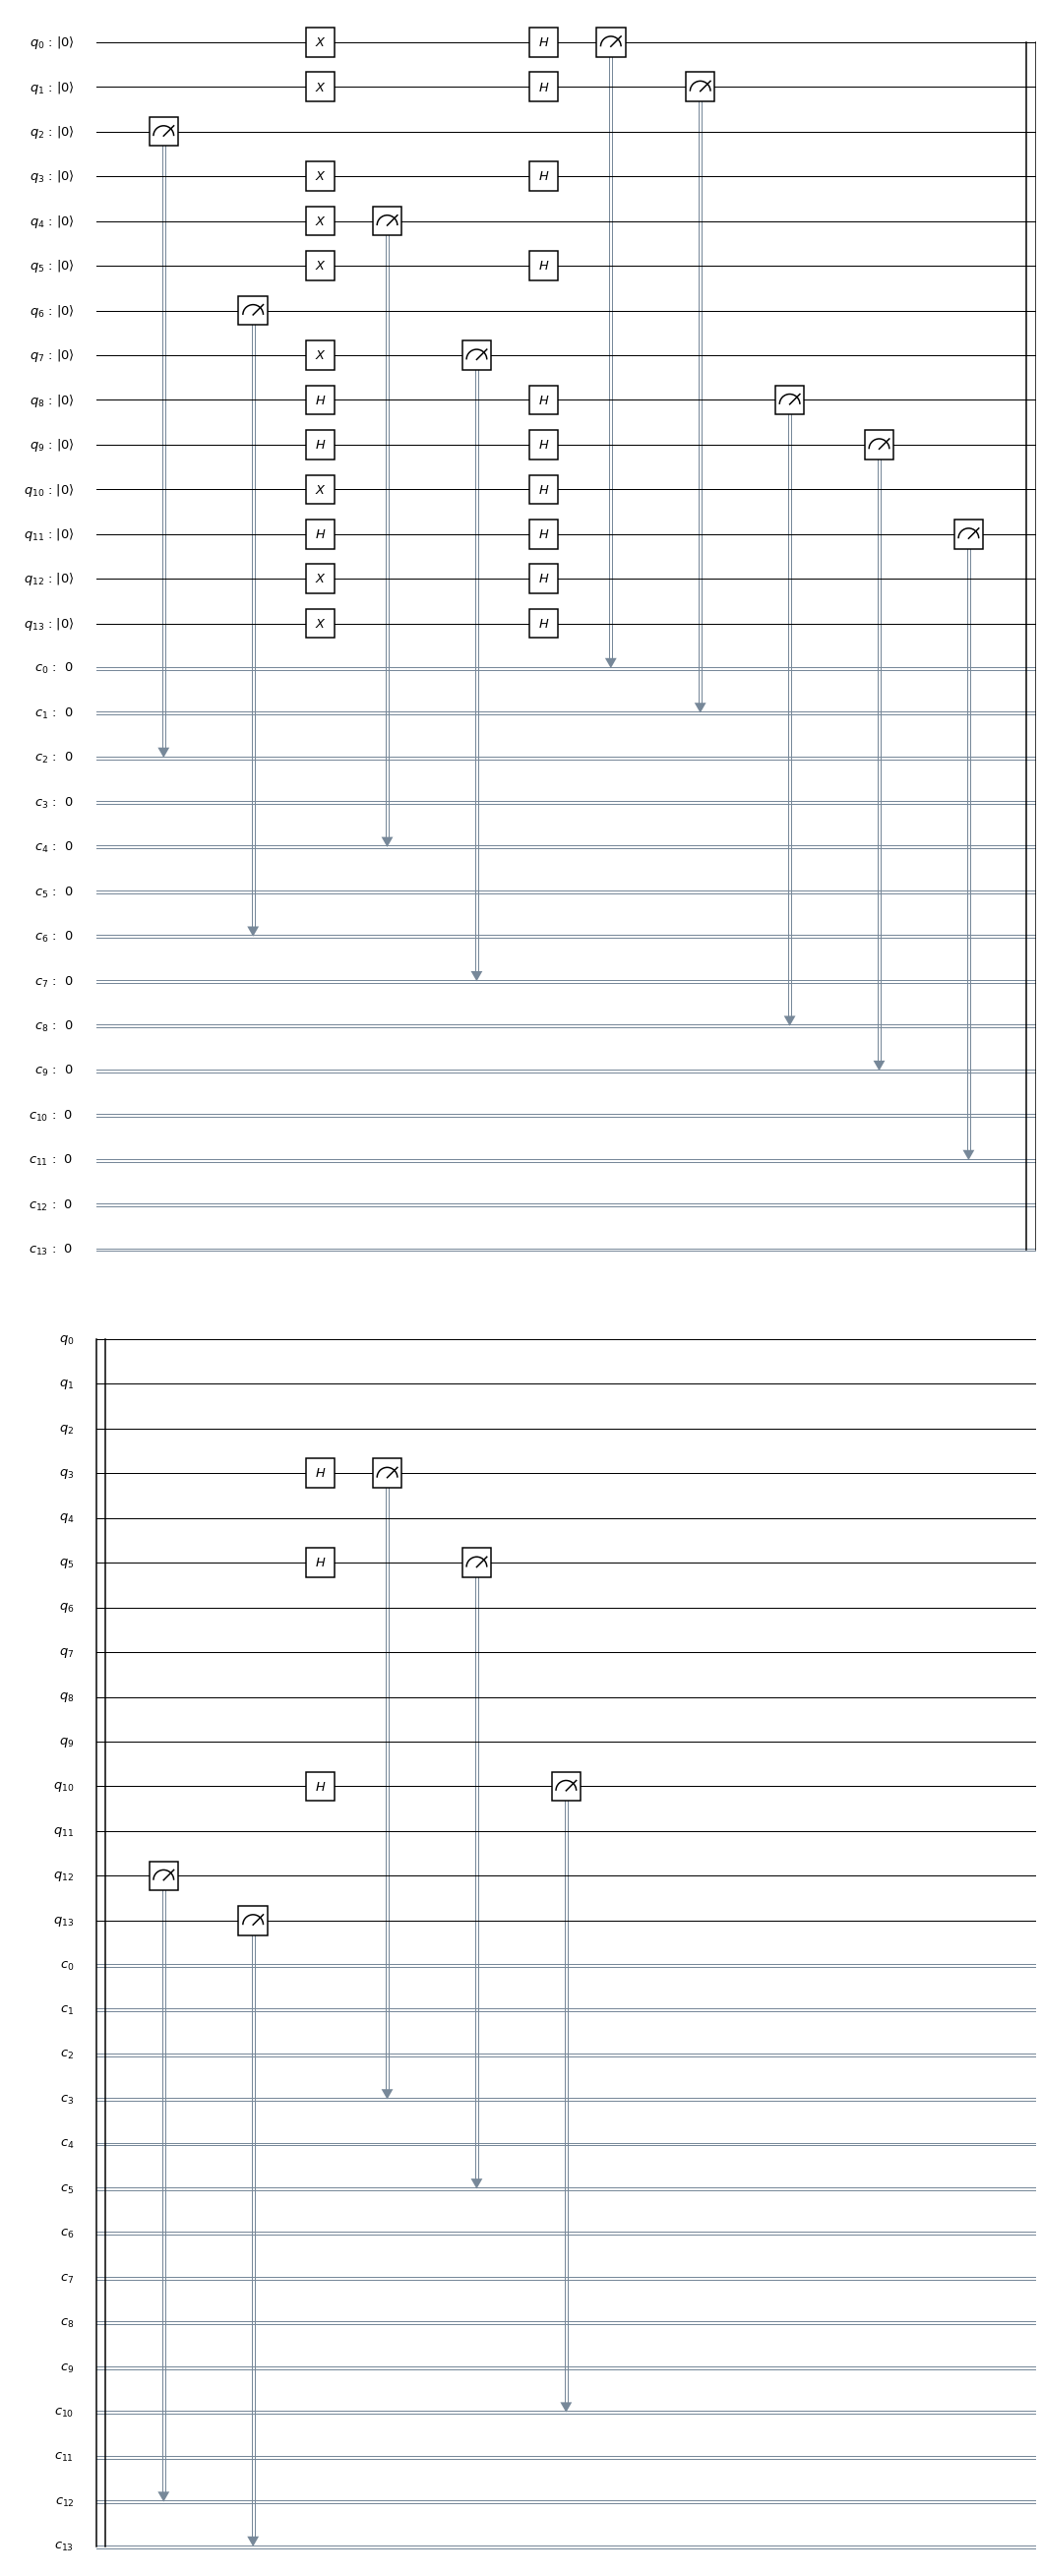

In [ ]:
q = QuantumRegister(key_size, name='q')
c = ClassicalRegister(key_size, name='c')
send = QuantumCircuit(q, c, name='send')

# Sending Alice's Qubits to Bob
for counter in range(key_size):
  value_key = key[counter]
  value_alice = basis_alice[counter]
  value_bob = basis_bob[counter]
  
  print('Value of key: ', value_key, 'Alice\'s basis: ', value_alice, 'Bob\'s basis: ', value_bob)
  
  if value_key == '1':
    send.x(q[counter])
  if value_alice == 'X':
    send.h(q[counter])
  if value_bob == 'X':
    send.h(q[counter]) 
  send.measure(q[counter],c[counter])
send.draw(output = 'mpl')



> **Figure 3: ** Circuit Representing Alice Sending her Qubits to Bob. This is based on the key Alice made, and the basis that Alice and Bob measured the basis. 



## Step 4: Bob Receives Qubits and Measures Qubits with Random Bases

Now we will send the circuit we created above to the Aer backend. The results shown below are the results that Bob gets after measuring the qubits. 

In [ ]:
result = execute([send], backend, shots=1).result()
counts = result.get_counts(send)
result_key = list(result.get_counts(send).keys())
result_bob = ''
result_bob += result_key[0][::-1]

print('Bob\'s results: ', result_bob)

Bob's results:  01011101001011


 ## Step 5: Alice and Bob Announce the Bases and Create the Key

Alice and Bob will now announce the basis to the public that they chose to measure the qubit in. By publishing the bases that they measured in, Alice and Bob will be able to share a key. If they agree on the basis, then they keep the result. If they do not agree on the basis, then they throw out that qubit. 

In [ ]:
# Compare Basis and Make Secret Key
key_alice = ''
for counter in range(key_size):
  if basis_alice[counter] == basis_bob[counter]:
    key_alice += key[counter]
key_alice_size = len(key_alice)
print('Alice\'s key: ', key_alice)
print('Size of Alice\'s key: ', key_alice_size)

key_bob = ''
for counter in range(key_size):
  if basis_alice[counter] == basis_bob[counter]:
    key_bob += result_bob[counter]
key_bob_size = len(key_bob)
print('Bob\'s key: ', key_bob)
print('Size of Bob\'s key: ', key_bob_size)

Alice's key:  0111010010
Size of Alice's key:  10
Bob's key:  0111010010
Size of Bob's key:  10


## Step 6: Alice Encodes her Message

From above, the keys that Alice and Bob match. So Alice and Bob now share a key to encrypt and decrypt the message. Notice that we started with a 14 qubit key, and that the key size between Alice and Bob is now 7. This is due to the random basis generator. Since Alice and Bob throw out the qubit when they do not agree on the basis, Alice must send a lot more qubits than the message she wants to send. If she sends only a few qubits, there might not be enough of a key to encode her message. This is why we chose a three character message for a 14 qubit quantum computer. Now, Alice can send a message by encoding the message with her key, which matches Bob's key, and this is shown below.

In [ ]:
# Alice encodes the message
encoded = ''
for i in range(len_mes):
  encoded += chr(ord(message[i]) + 2*ord(key_alice[i]) % 256)
print('Alice wants to send the message: ', message)
print('Alice\'s encoded message: ', encoded)  

Alice wants to send the message:  vlq
Alice's encoded message:  ÖÎÓ


## Step 7: Bob Decodes Alice's Encoded Message 

Bob now receives the encrypted message from Alice. Now Bob can use the key he made, shown in the output to decode Alice's message. 

In [ ]:
# Bob decrypts the message
decoded = ''
for i in range(len_mes):
  decoded += chr(ord(encoded[i]) - 2*ord(key_bob[i]) % 256)
print('Bob\'s decoded message: ', decoded) 

Bob's decoded message:  vlq


Bob has successfully decoded Alice's message! 

## Repeat Procedure To See if Alice and Bob are Able to Secretly Communicate

Using the Aer backend, let's see how many times Alice and Bob are able to communicate using the BB84 Protocol. 

In [ ]:
run_time = 10
count_fail = 0
count_success = 0
for count in range(run_time):
  if (count%1 == 0):
    print('Progress: ', count, "...", (float)(count*100/run_time), '%')
  key_test = ''
  
  job1 = execute(qc_alice, backend, shots=1)
  job1.status()
  result = job1.result()
  counts = result.get_counts()
  result_key_test = list(counts.keys())
  temp_out = result_key_test[0]
  key += temp_out
  key_test = key_test[:key_size]

  q = QuantumRegister(key_size, name='q')
  c = ClassicalRegister(key_size, name='c')
  send= QuantumCircuit(q, c, name='send')

  # Sending Alice's Qubits to Bob
  for counter in range(key_size):
    value_key = key[counter]
    value_alice = basis_alice[counter]
    value_bob = basis_bob[counter]

    if value_key == '1':
      send.x(q[counter])
    if value_alice == 'X':
      send.h(q[counter])
    if value_bob == 'X':
      send.h(q[counter]) 
    send.measure(q[counter],c[counter])

  job2 = execute(send, backend, shots=1)
  job2.status()
  
  result = job2.result()
  counts = result.get_counts()
  result_key = list(counts.keys())
  result_bob = ''
  result_bob += result_key[0][::-1]
    
   # Compare Basis and Make Secret Key
  key_alice = ''
  for counter in range(key_size):
    if basis_alice[counter] == basis_bob[counter]:
      key_alice += key[counter]
  key_alice_size = len(key_alice)

  key_bob = ''
  for counter in range(key_size):
    if basis_alice[counter] == basis_bob[counter]:
      key_bob += result_bob[counter]
  key_bob_size = len(key_bob)
  
  # Alice encodes the message
  encoded = ''
  for i in range(len_mes):
    encoded += chr(ord(message[i]) + 2*ord(key_alice[i]) % 256)

  # Bob decrypts the message
  decoded = ''
  for i in range(len_mes):
    decoded += chr(ord(encoded[i]) - 2*ord(key_bob[i]) % 256)

  print('Bob\'s decoded message: ', decoded)
  if decoded == 'vlq':
    count_success += 1
  else:
    count_fail += 1

print('Number of successful decodes: ', count_success)
print('Number of failed decodes: ', count_fail)

Progress:  0 ... 0.0 %
Bob's decoded message:  vlq
Progress:  1 ... 10.0 %
Bob's decoded message:  vlq
Progress:  2 ... 20.0 %
Bob's decoded message:  vlq
Progress:  3 ... 30.0 %
Bob's decoded message:  vlq
Progress:  4 ... 40.0 %
Bob's decoded message:  vlq
Progress:  5 ... 50.0 %
Bob's decoded message:  vlq
Progress:  6 ... 60.0 %
Bob's decoded message:  vlq
Progress:  7 ... 70.0 %
Bob's decoded message:  vlq
Progress:  8 ... 80.0 %
Bob's decoded message:  vlq
Progress:  9 ... 90.0 %
Bob's decoded message:  vlq
Number of successful decodes:  10
Number of failed decodes:  0


From above, we can see that the Aer backend is accurate and is able to successfully encrypt and decrypt a message. A plot is shown below of the number of times Alice and Bob were successfully able to communicate. 

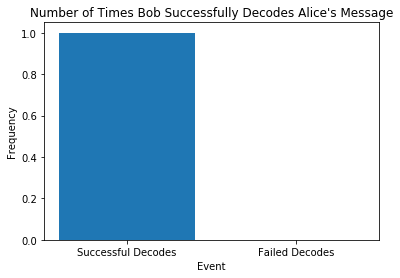

In [ ]:
# Plot
label = ['Successful Decodes', 'Failed Decodes']
plt.bar(label,[(float)(count_success/run_time), (float)(count_fail/run_time)])
plt.xlabel("Event")
plt.ylabel("Frequency")
plt.title('Number of Times Bob Successfully Decodes Alice\'s Message')
plt.show()



> **Figure 4: ** The number of times Alice and Bob were successfully able to send a message using the BB84 Protocol on the Aer backend. 



From Figure 4, we can see that the Aer backend, or the quantum computer simulator, is very accurate and Alice is able to encrypt a message and send it to Bob, and Bob was able to decrypt Alice's message. 

# BB84 Quantum Key Distribution Protocol Between Alice and Bob Using IBM Q 14 at Melbourne

We will run the same code that we ran using at the Aer Backend with the IBM 14 Q quantum computer at Melbourne. Alice will send the same message, "vlq", as before, so we will skip step 1. 

## Step 2: Alice Creates a Random Key

We will use the same circuit as in Figure 2. So we will send this circuit to IBM's Quantum Computer to see the key that it generated. The key is shown below. 

In [ ]:
key_ibm = ''
job1 = execute(qc_alice, backend_ibm, shots=1)
job1.status()
result_ibm = job1.result()
counts_ibm = result_ibm.get_counts()
print('Random Key that the IBM Q 16 Melbourne created:', counts_ibm)
result_key_ibm = list(counts_ibm.keys())
temp_out_ibm = result_key_ibm[0]
key_ibm += temp_out_ibm
key_ibm = key_ibm[:key_size]
print('(IBMQ) Alice\'s key ', key_ibm)
print('(IBMQ) Length of Alice\'s key: ', len(key_ibm))

Random Key that the IBM Q 16 Melbourne created: {'11111111011101': 1}
(IBMQ) Alice's key  11111111011101
(IBMQ) Length of Alice's key:  14


This is a different key than the key that the Aer backend generated for the same circuit. 

## Step 3: Alice Sends Qubits Corresponding to the Key to Bob

Since the keys that the IBM computer and the Aer Backend are different, the circuit corresponding to Alice sending qubits to Bob will be different. However, the code from the Aer backend and the IBM quantum computer are the same. 

Value of key:  1 Alice's basis:  X Bob's basis:  Z
Value of key:  1 Alice's basis:  X Bob's basis:  Z
Value of key:  1 Alice's basis:  Z Bob's basis:  Z
Value of key:  1 Alice's basis:  X Bob's basis:  X
Value of key:  1 Alice's basis:  Z Bob's basis:  Z
Value of key:  1 Alice's basis:  X Bob's basis:  X
Value of key:  1 Alice's basis:  Z Bob's basis:  Z
Value of key:  1 Alice's basis:  Z Bob's basis:  Z
Value of key:  0 Alice's basis:  X Bob's basis:  X
Value of key:  1 Alice's basis:  X Bob's basis:  X
Value of key:  1 Alice's basis:  X Bob's basis:  X
Value of key:  1 Alice's basis:  X Bob's basis:  X
Value of key:  0 Alice's basis:  Z Bob's basis:  X
Value of key:  1 Alice's basis:  X Bob's basis:  Z


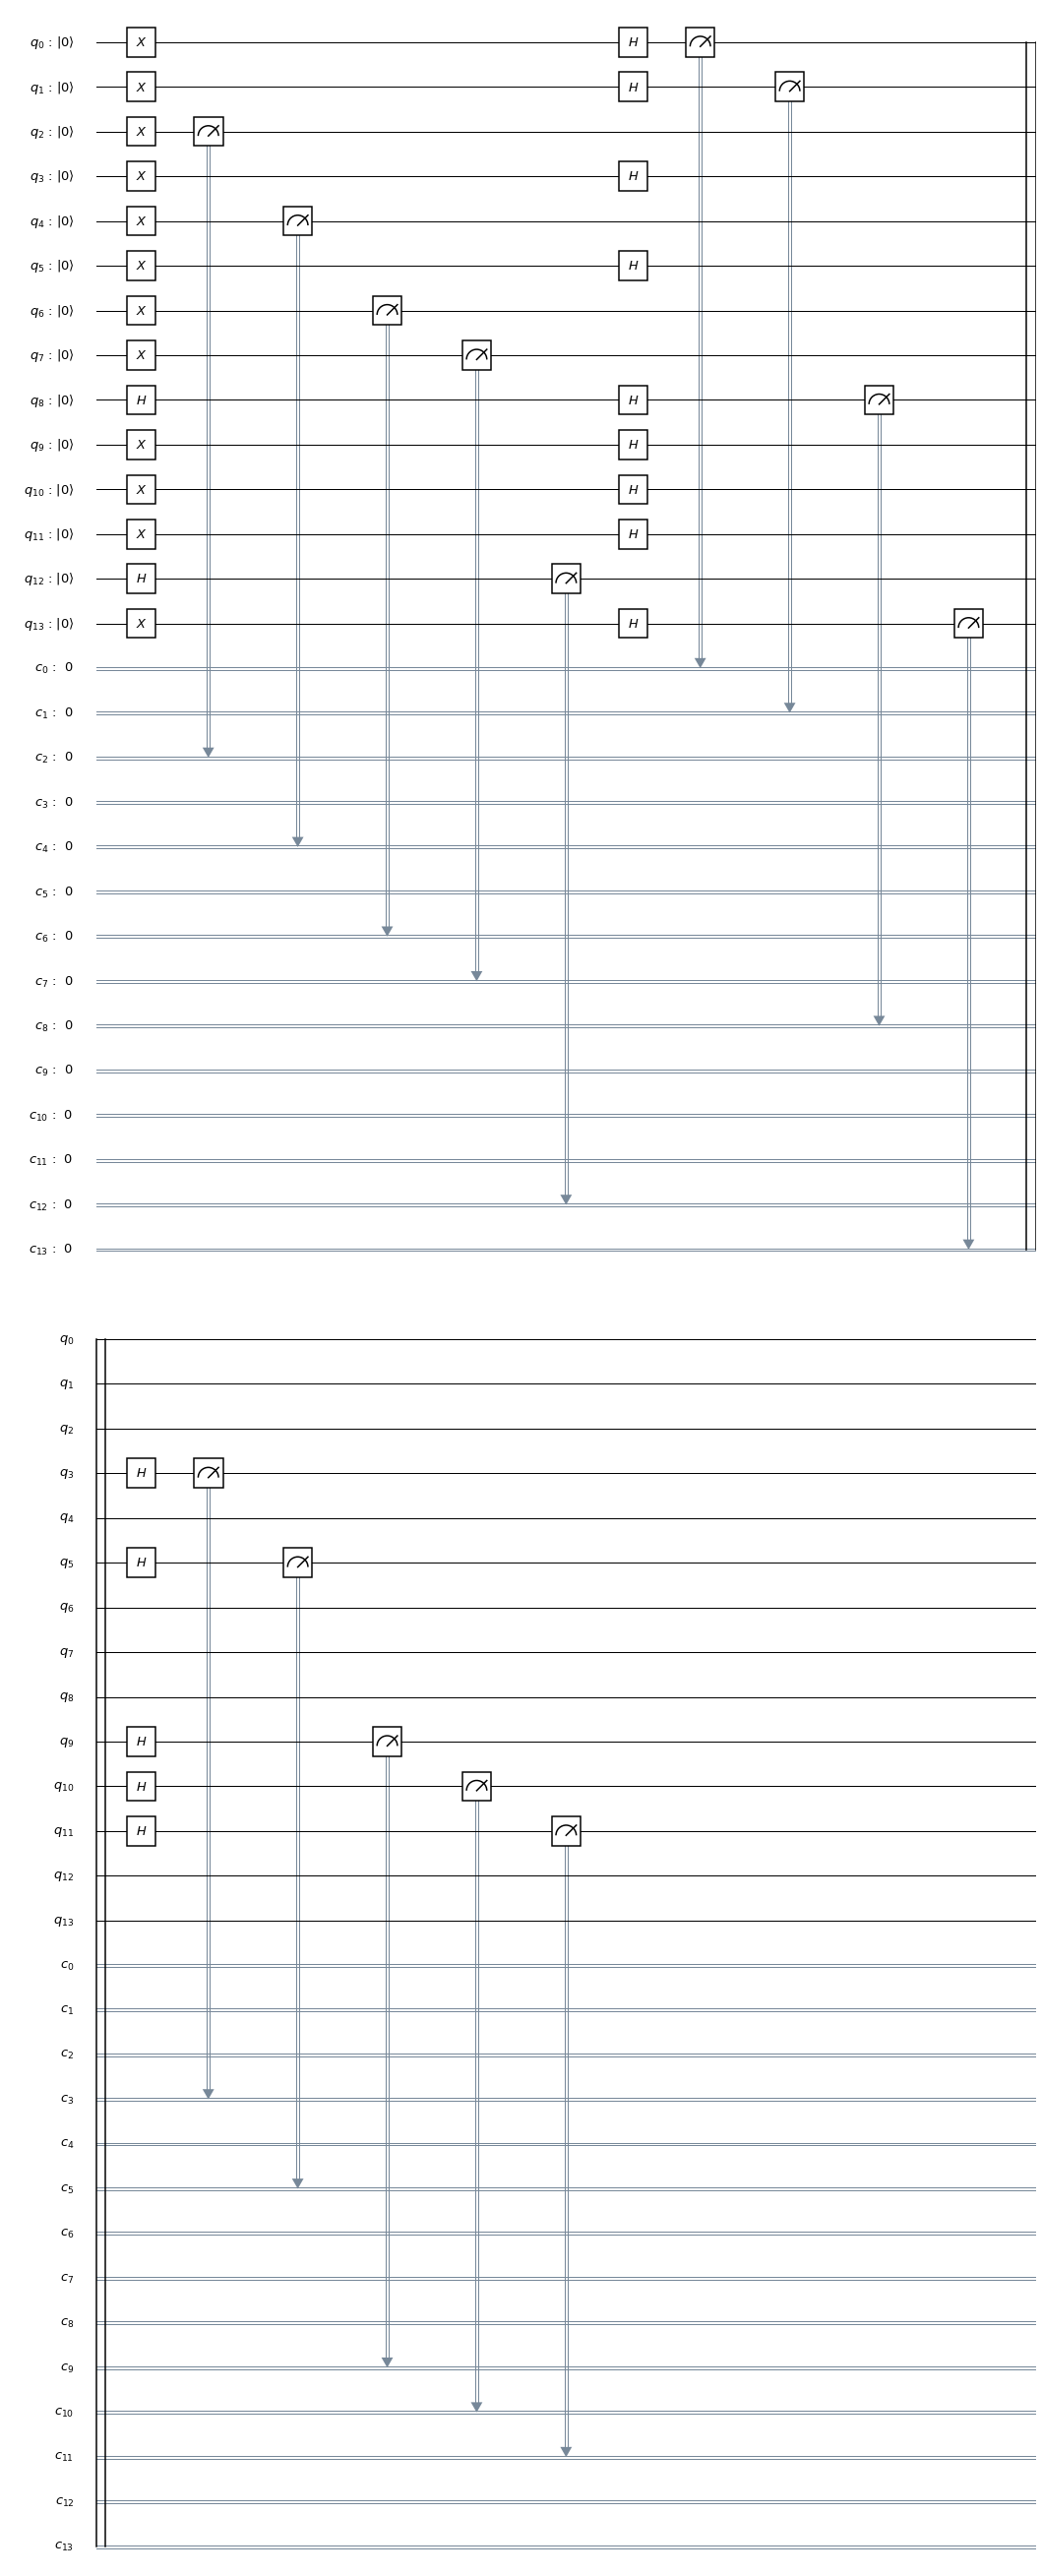

In [ ]:
q_ibm = QuantumRegister(key_size, name='q')
c_ibm = ClassicalRegister(key_size, name='c')
send_ibm = QuantumCircuit(q_ibm, c_ibm, name='send')

# Sending Alice's Qubits to Bob
for counter in range(key_size):
  value_key_ibm = key_ibm[counter]
  value_alice_ibm = basis_alice[counter]
  value_bob_ibm = basis_bob[counter]
  
  print('Value of key: ', value_key_ibm, 'Alice\'s basis: ', value_alice_ibm, 'Bob\'s basis: ', value_bob_ibm)
  
  if value_key_ibm == '1':
    send_ibm.x(q_ibm[counter])
  if value_alice_ibm == 'X':
    send_ibm.h(q_ibm[counter])
  if value_bob_ibm == 'X':
    send_ibm.h(q_ibm[counter]) 
  send_ibm.measure(q_ibm[counter],c_ibm[counter])
send_ibm.draw(output = 'mpl')

> **Figure 11: ** Circuit representing Alice sending her qubits to Bob using random key that the IBM computer created. This circuit will be sent to IBM's quantum computer and the results after exection will be Bob's results. 

## Step 4: Bob Receives Qubits and Measures Qubits with Random Bases

Now, the circuit in Figure 11 is then sent to the IBM quantum computer, and the results after the execution is shown below. The key printed below is the key that IBM has created. 

In [ ]:
job2 = execute(send_ibm, backend_ibm, shots=1)
job2.status()
result_ibm = job2.result()
counts_ibm = result_ibm.get_counts()
result_key_ibm = list(counts_ibm.keys())
result_bob_ibm = ''
result_bob_ibm += result_key_ibm[0][::-1]

print('Key: ', key_ibm)
print('Bob\'s results: ', result_bob_ibm)

Key:  11111111011101
Bob's results:  11011111111111


## Step 5: Alice and Bob Announce the Bases and Create the Key

Now, Alice and Bob announce the bases that they measured the qubits in. The keys should be the same. However, there are many errors using a quantum computer. As shown below, Alice and Bob's keys are different, and this is before an eavesdropper is present. However, both of them do not know this since they do not publish results. This will lead to Bob unable to successfully decode Alice message. 

In [ ]:
# Compare Basis and Make Secret Key
key_alice_ibm = ''
for counter in range(key_size):
  if basis_alice[counter] == basis_bob[counter]:
    key_alice_ibm += key_ibm[counter]
key_alice_size_ibm = len(key_alice_ibm)
print('Alice\'s key: ', key_alice_ibm)
print('Size of Alice\'s key: ', key_alice_size_ibm)

key_bob_ibm = ''
for counter in range(key_size):
  if basis_alice[counter] == basis_bob[counter]:
    key_bob_ibm += result_bob_ibm[counter]
key_bob_size_ibm = len(key_bob_ibm)
print('Bob\'s key: ', key_bob_ibm)
print('Size of Bob\'s key: ', key_bob_size_ibm)


Alice's key:  1111110111
Size of Alice's key:  10
Bob's key:  0111111111
Size of Bob's key:  10


We can see above that the keys that Alice and Bob have do not match. This is due to errors from the measurements on the quantum computer. 

## Step 6 & 7: Alice Encodes her Message and Bob Decodes Alice's Message

From the previous step, we can see that the keys that Alice and Bob have do not match. Now, Alice will encode her message using her key. She sends that encoded message to Bob. Bob decodes it, and his results are shown below. 

In [ ]:
# Alice encodes the message
encoded = ''
for i in range(len_mes):
  encoded += chr(ord(message[i]) + 2*ord(key_alice_ibm[i]) % 256)
print('Alice wants to send the message: ', message)
print('Alice\'s encoded message: ', encoded)  

# Bob decrypts the message
decoded = ''
for i in range(len_mes):
  decoded += chr(ord(encoded[i]) - 2*ord(key_bob_ibm[i]) % 256)
print('Bob\'s decoded message: ', decoded) 


Alice wants to send the message:  vlq
Alice's encoded message:  ØÎÓ
Bob's decoded message:  xlq


From above, we can see that the decoded message is only one letters off of the message Alice sent. This is because the first number in Alice's and Bob's key are different. 

## Repeat Procedure To See if Alice And Bob are Able to Communicate

Now we will run over it 10 times to see how many times it successfully decodes. Running on the IBM Quantum Computer does take a lot of time (20 minutes per each run), therefore, we will only run it 10 times. 

In [ ]:
run_time = 10
count_fail = 0
count_success = 0
for count in range(run_time):
  if (count%1 == 0):
    print('Progress: ', count, "...", (float)(count*100/run_time), '%')
  key_ibm = ''
  
  job1 = execute(qc_alice, backend_ibm, shots=1)
  job1.status()
  result = job1.result()
  counts = result.get_counts()
  result_key = list(counts.keys())
  temp_out = result_key[0]
  key_ibm += temp_out
  key_ibm = key_ibm[:key_size]

  q_ibm = QuantumRegister(key_size, name='q')
  c_ibm = ClassicalRegister(key_size, name='c')
  send_ibm = QuantumCircuit(q_ibm, c_ibm, name='send')

  # Sending Alice's Qubits to Bob
  for counter in range(key_size):
    value_key = key_ibm[counter]
    value_alice = basis_alice[counter]
    value_bob = basis_bob[counter]

    if value_key == '1':
      send_ibm.x(q[counter])
    if value_alice == 'X':
      send_ibm.h(q[counter])
    if value_bob == 'X':
      send_ibm.h(q[counter]) 
    send_ibm.measure(q[counter],c[counter])

  job2 = execute(send_ibm, backend_ibm, shots=1)
  job2.status()
  
  result = job2.result()
  counts = result.get_counts()
  result_key = list(counts.keys())
  result_bob = ''
  result_bob += result_key[0][::-1]
    
   # Compare Basis and Make Secret Key
  key_alice = ''
  for counter in range(key_size):
    if basis_alice[counter] == basis_bob[counter]:
      key_alice += key_ibm[counter]
  key_alice_size = len(key_alice)

  key_bob = ''
  for counter in range(key_size):
    if basis_alice[counter] == basis_bob[counter]:
      key_bob += result_bob[counter]
  key_bob_size = len(key_bob)
  
  # Alice encodes the message
  encoded = ''
  for i in range(len_mes):
    encoded += chr(ord(message[i]) + 2*ord(key_alice[i]) % 256)

  # Bob decrypts the message
  decoded = ''
  for i in range(len_mes):
    decoded += chr(ord(encoded[i]) - 2*ord(key_bob[i]) % 256)

  print('Bob\'s decoded message: ', decoded)
  if decoded == 'vlq':
    count_success += 1
  else:
    count_fail += 1

print('Number of successful decodes: ', count_success)
print('Number of failed decodes: ', count_fail)

Progress:  0 ... 0.0 %
Bob's decoded message:  vlq
Progress:  1 ... 10.0 %
Bob's decoded message:  xlo
Progress:  2 ... 20.0 %
Bob's decoded message:  xlq
Progress:  3 ... 30.0 %
Bob's decoded message:  vjs
Progress:  4 ... 40.0 %
Bob's decoded message:  vlq
Progress:  5 ... 50.0 %
Bob's decoded message:  vlo
Progress:  6 ... 60.0 %
Bob's decoded message:  xlq
Progress:  7 ... 70.0 %
Bob's decoded message:  vlo
Progress:  8 ... 80.0 %
Bob's decoded message:  vlq
Progress:  9 ... 90.0 %
Bob's decoded message:  vls
Number of successful decodes:  3
Number of failed decodes:  7


From Bob's decoded messages, we can see that the quantum computer is very close to the getting the decoding the messages. 3 out of the 10 messages were successfully encrypted and decrypted. 5 out of the 10 messages are one letter incorrect from the original message. 

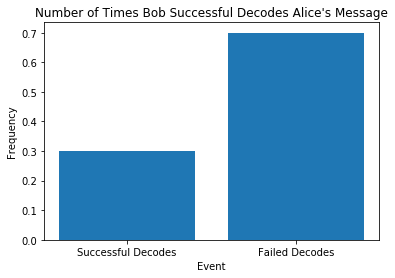

In [ ]:
# Plot
label = ['Successful Decodes', 'Failed Decodes']
plt.bar(label,[(float)(count_success/run_time), (float)(count_fail/run_time)])
plt.xlabel("Event")
plt.ylabel("Frequency")
plt.title('Number of Times Bob Successfully Decodes Alice\'s Message')
plt.show()


> **Figure 12: ** Histogram on the number of time Bob has successfully decoded Alice's message. 3 out of the 10 attempt were successful. 

We can see from the histogram that Alice and Bob are not able to reliably send secret communcation to each other through a quantum computer. This is due to errors on the measurements of the quantum computer. If they sent out parts of their key, like they do when they suspect for an eavesdropper, they might think it was an eavesdropper. However, it was just an error on the quantum computer. Also, the message that Alice sent to Bob was only three characters. We were also restricted to using a 14 bit quantum computer. In order for Alice to send a longer message, the keys have to be longer. This will require more qubits or rerunning on the quantum computer several times to create a longer key. However, it is impressive that there were a few successful attempts! 

# Introducing Eve the Eavesdropper Using the Aer Backend


We will now introduce Eve, who wants to eavesdrop on Alice and Bob. She first intercepts the qubits that Alice sends, measures them, and prepares a qubit based on her measurement to Bob. However, the problem is Eve does not know which basis to measure so she takes a guess. If she guesses correctly, and Alice and Bob use the same basis, she knows the result, and she has not been detected. Alice and Bob will publish some of their results and compare. If they agree on all their results, this means that there is no eavesdropper. If they do not agree on all of their results, Alice and Bob have detected Eve's presence, and should throw out all their results. 

## Step 1: Eve Intercepts Alice and Measures the Qubits

We will now introduce Eve the eavesdropper. Eve captures the qubit that Alice sent and measures it. Based on her measurement result, she prepares another qubit to send to Bob. However, Alice does not know which basis to measure the qubits, so she guesses. The results shown below are Eve's results after measuring all of Alice's qubits.

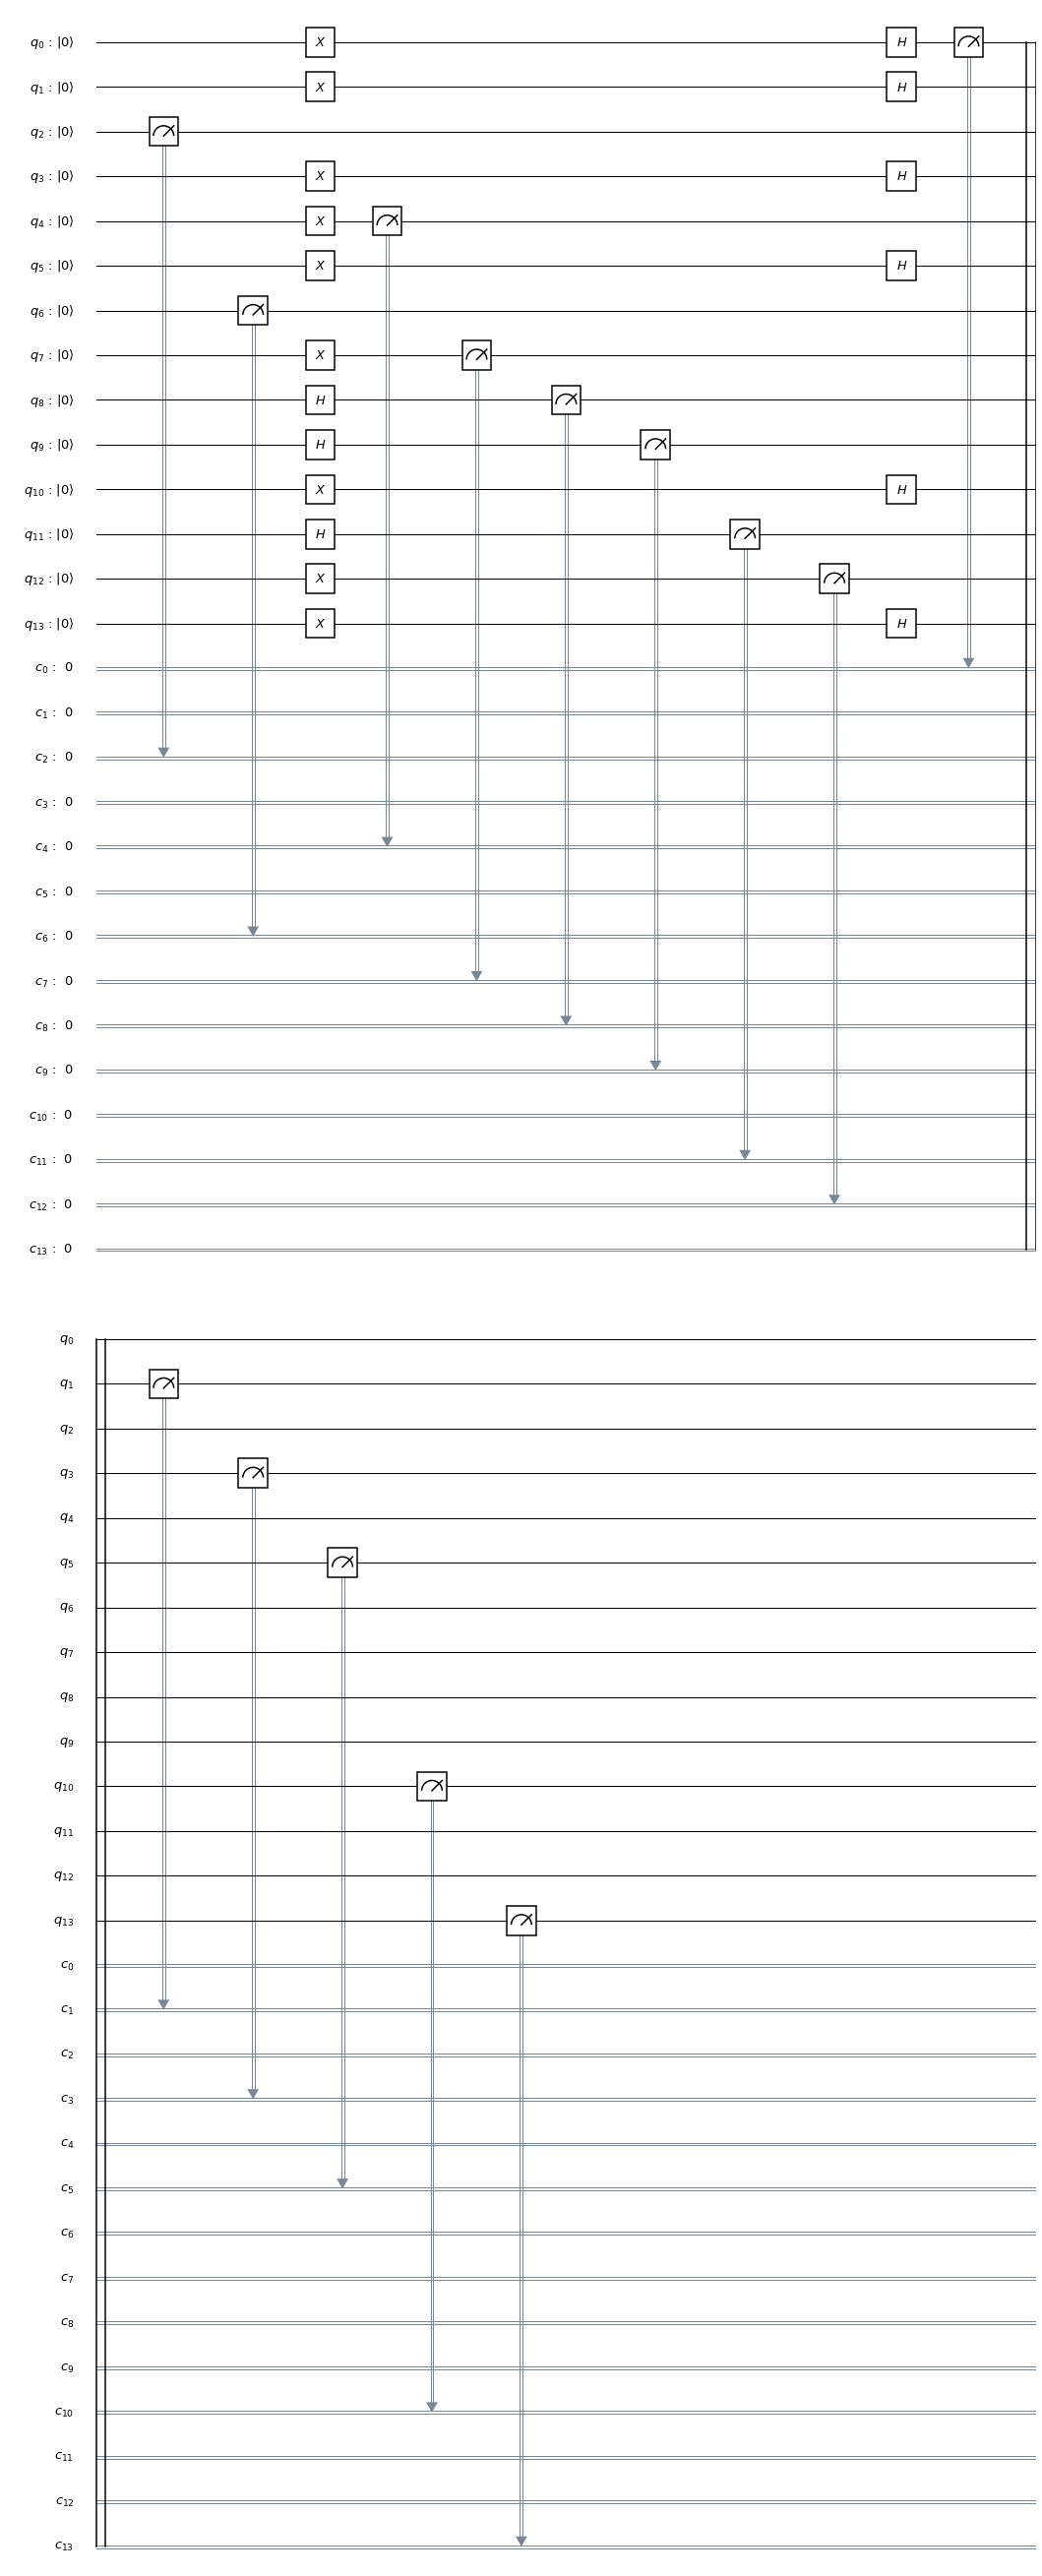

In [ ]:
# Eve intercepts Alice
q_eve = QuantumRegister(key_size, name='q')
c_eve = ClassicalRegister(key_size, name='c')
eve = QuantumCircuit(q_eve, c_eve, name='send')

# Eve intercepts
for counter in range(key_size):
  value_key = key[counter]
  value_alice = basis_alice[counter]
  
  if value_key == '1':
    eve.x(q[counter])
  if value_alice == 'X':
    eve.h(q[counter])
  eve.measure(q_eve[counter],c_eve[counter])
eve.draw(output = 'mpl')



> **Figure 5: ** Circuit Representing Eve Intercepting Alice's Transmission. Eve captures Alice's qubits, measures it, then prepare a qubit to send to Bob based on the results she receives. 

Now, we will execute this circuit on the Aer backend and record the Eve's results. This is shown below. 

In [ ]:
result = execute([eve], backend, shots=1).result()
counts = result.get_counts(eve)
result_key = list(result.get_counts(eve).keys())
result_eve = ''
result_eve += result_key[0][::-1]

print('Key (Same Key from Aer Backend): ', key)
print('Eve\'s results: ', result_eve)

Key (Same Key from Aer Backend):  11011101001011
Eve's results:  01001101101011


## Step 2: Eve Sends the Qubits Based on Her Results

Now, Eve sends her results to Bob. She prepares all the qubits based off her results. 

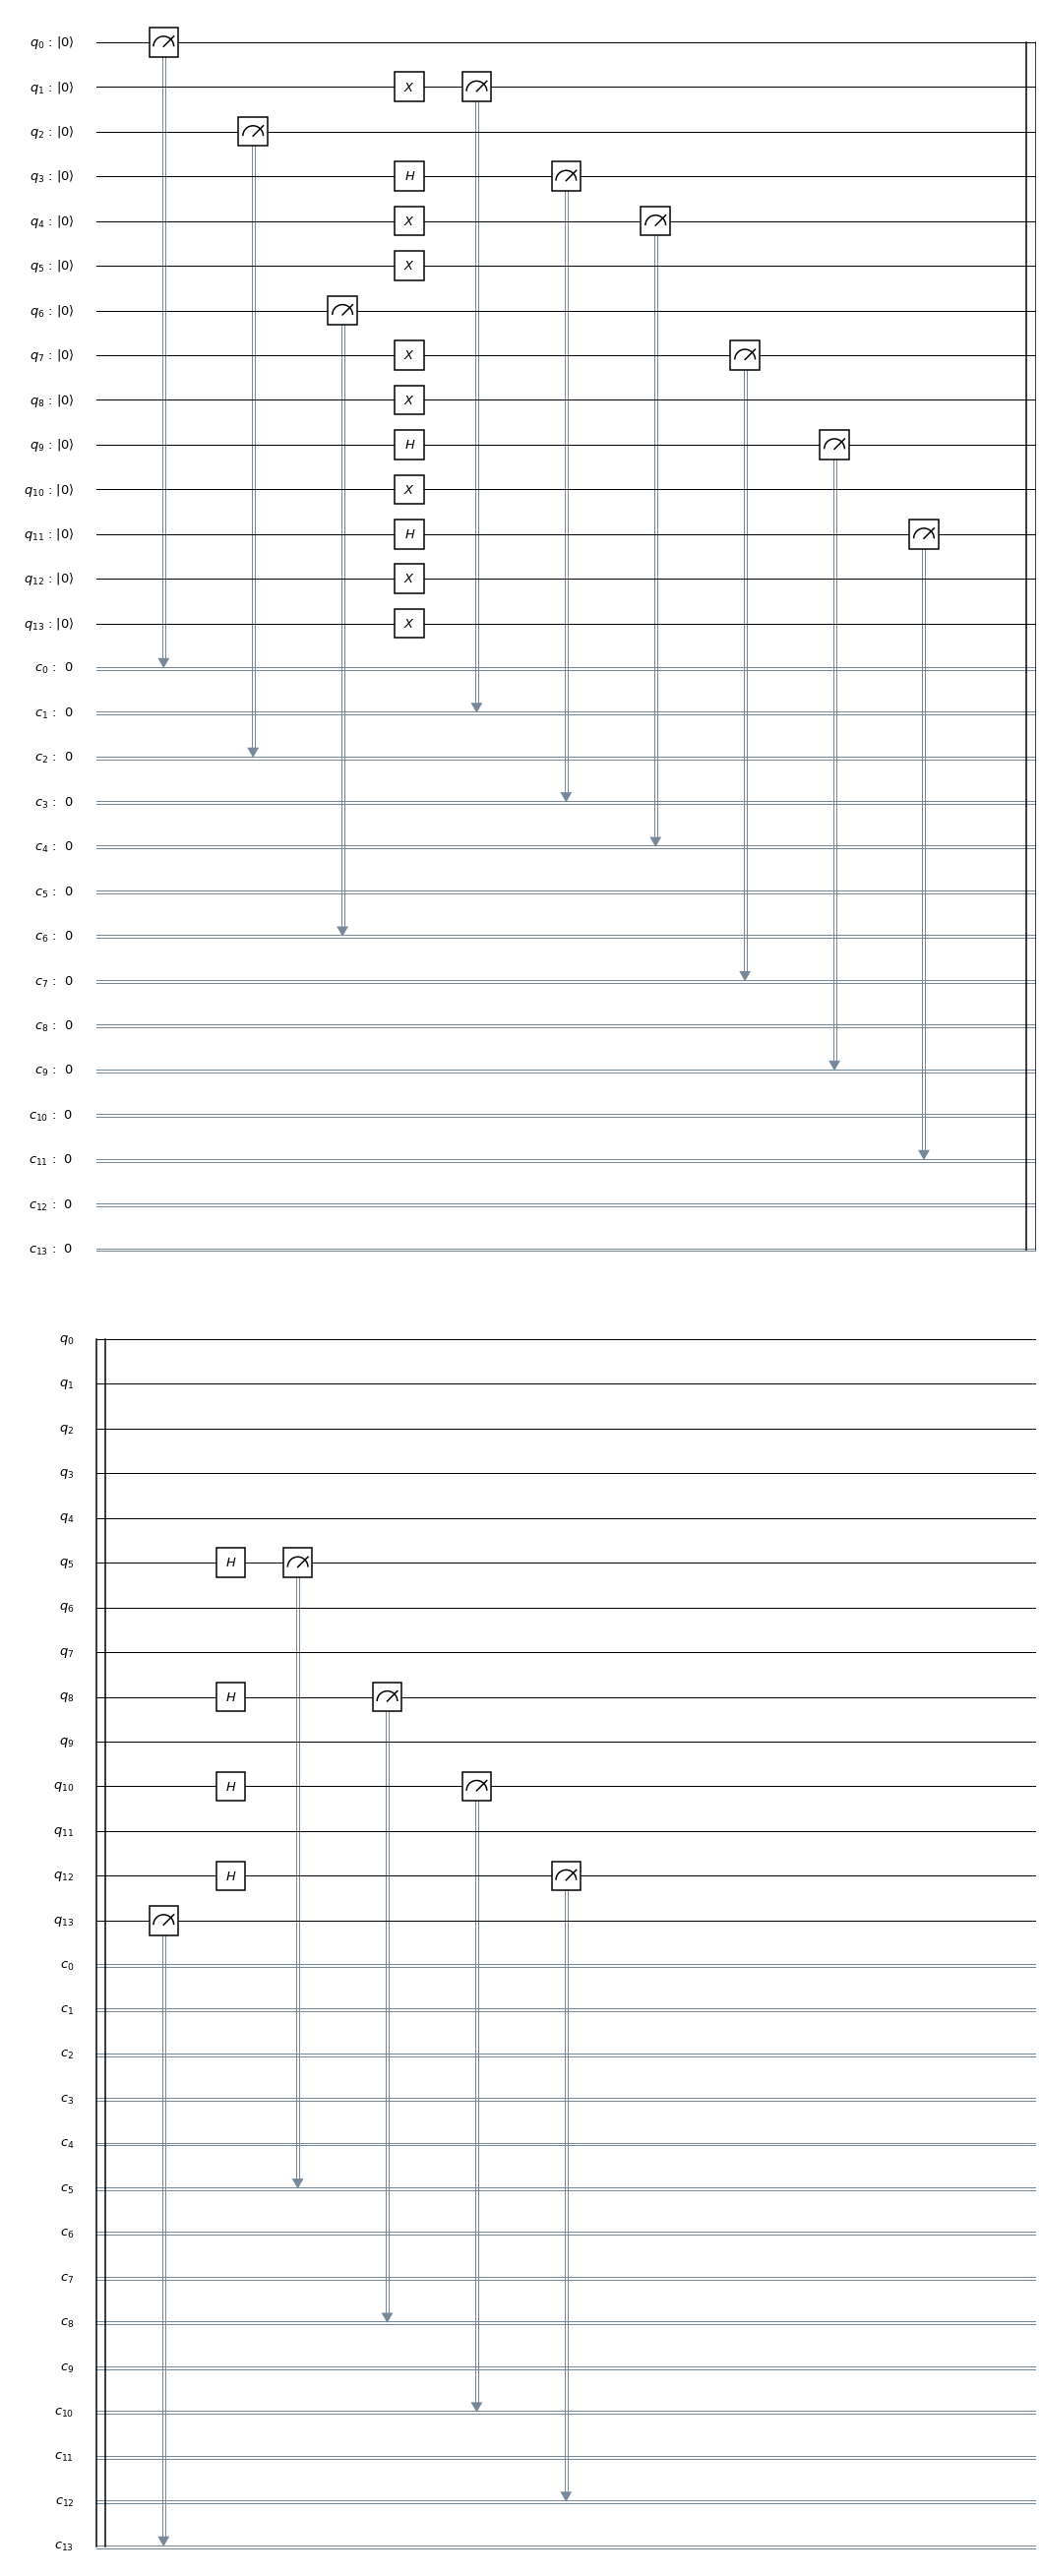

In [ ]:
# Eve sends her results to Bob
q_fromeve = QuantumRegister(key_size, name='q')
c_fromeve = ClassicalRegister(key_size, name='c')
fromeve = QuantumCircuit(q_fromeve, c_fromeve, name='send')

for counter in range(key_size):
  value_key = result_eve[counter]
  value_bob = basis_bob[counter]
  
  if value_key == '1':
    fromeve.x(q_eve[counter])
  if value_bob == 'X':
    fromeve.h(q_eve[counter]) 
  fromeve.measure(q_eve[counter],c_eve[counter])
fromeve.draw(output = 'mpl')



> **Figure 6: ** Circuit Representing Bob Receiving the Qubits From Eve. This circuit is based on the random bases measurement that Alice and Bob made.We can see that this circuit is different from Figure 3, when Eve did not intervene. This is because Eve does not know which basis to measure in, so she guesses. 

## Step 3: Bob Receives the Qubits and Measures Them In a Randomly Chosen Bases

The circuit above is then sent to the Aer backend and the results are shown below. As shown below, there is a difference in the results when Eve intervenes. The keys that Bob has when Eve intervenes and when Eve does not intervene are different. 

In [ ]:
# Bob's result from Eve
result_eavs = ''
result_eve = execute(fromeve, backend, shots=1).result()
counts_eve = result_eve.get_counts()
result_key_eve = list(result_eve.get_counts().keys())
result_eavs += result_key_eve[0][::-1]

print('Bob\'s result when Eve did not intervened: ', result_bob)
print('Bob\'s result when Eve intervened: ', result_eavs)

Bob's result when Eve did not intervened:  01011101001011
Bob's result when Eve intervened:  01001001100101


## Step 4: Alice and Bob Announce the Bases and Create the Key

Now, Alice and Bob will now publish the bases that the measured each of the qubits in. From the results below, we can see that that Alice and Bob's keys do not match. 

In [ ]:
# Compare Basis and Make Secret Key
print('Alice\'s key: ', key_alice)
print('Size of Alice\'s key: ', key_alice_size)

key_bob_eavs = ''
for counter in range(key_size):
  if basis_alice[counter] == basis_bob[counter]:
    key_bob_eavs += result_eavs[counter]
key_bob_eavs_size = len(key_bob_eavs)
print('Bob\'s key: ', key_bob_eavs)
print('Size of Bob\'s key: ', key_bob_eavs_size)

Alice's key:  0111010010
Size of Alice's key:  10
Bob's key:  0010011001
Size of Bob's key:  10


## Step 5: Alice and Bob Checks for an Eavesdropper

Now, Alice and Bob want to check for an eavesdropper. So they publish parts of the key that to see if they match. If any of their results do not match, it means that there was an eavsdropper. Since the number of qubits are very few, Bob and Alice can only publish very few of their results to the public in order to use the rest of their keys to encrypt the message. We will subtract the length of the message from the rest of the key, and randomly choose which results to publish to the public. In our example, the length of the key that Alice and Bob share is 10, shown in step 4. We set aside 3 keys, so the number of keys Alice and Bob can share ranges from one to seven. We choose a random number between 1 and 7 for the amount of results Alice and Bob should publish, which is accomplished by numpy's randint function. 


In [ ]:
# Bob and Alice make parts of their key public
numBits = key_alice_size - len_mes
numBitstoCheck = np.random.randint(0,numBits)
detect = False

indexes = []
for i in range(numBitstoCheck):
  indextoCheck = np.random.randint(0,key_alice_size)
  if indextoCheck in indexes:
    i -= 1
  else:
    indexes.append(indextoCheck)

for i in range(len(indexes)):
  index = indexes[i]
  value_bob = key_bob_eavs
  value_alice = key_alice
  if (value_bob != value_alice):
    detect = True

if detect:
  print('Eve has been detected!')
else:
  print('Eve has not been detected!')


Eve has been detected!


We can see that Eve has been detected! This means that there was a discrepancy between Alice and Bob's results that they should agree on. Now we will run over it 10, 100 and 1000 times using the Aer backend to see the probability of Eve getting caught by Alice and Bob.


## Repeat Procedure To See If Eve Is Undetected or Detected

We will first run this 10 times to see how many times Eve is detected or undetected. 

In [ ]:
run_time = 10
count_eve_detect = 0
count_eve_undetect = 0
for count in range(run_time):
  if (count%10 == 0):
    print('Progress: ', count, "...", (float)(count*100/run_time), '%')
  
  # Eve intercepts Alice
  q_eve = QuantumRegister(key_size, name='q')
  c_eve = ClassicalRegister(key_size, name='c')
  eve = QuantumCircuit(q_eve, c_eve, name='send')

  # Eve intercepts
  for counter in range(key_size):
    value_key = key[counter]
    value_alice = basis_alice[counter]

    if value_key == '1':
      eve.x(q[counter])
    if value_alice == 'X':
      eve.h(q[counter])
    eve.measure(q_eve[counter],c_eve[counter])
#   eve.draw(output = 'mpl')

  result = execute([eve], backend, shots=1).result()
  counts = result.get_counts(eve)
  result_key = list(result.get_counts(eve).keys())
  result_eve = ''
  result_eve += result_key[0][::-1]

#   print('Key (Same Key from Aer Backend): ', key)
#   print('Eve\'s results: ', result_eve)
  
  # Eve sends her results to Bob
  q_fromeve = QuantumRegister(key_size, name='q')
  c_fromeve = ClassicalRegister(key_size, name='c')
  fromeve = QuantumCircuit(q_fromeve, c_fromeve, name='send')

  for counter in range(key_size):
    value_key = result_eve[counter]
    value_bob = basis_bob[counter]

    if value_key == '1':
      fromeve.x(q_eve[counter])
    if value_bob == 'X':
      fromeve.h(q_eve[counter]) 
    fromeve.measure(q_eve[counter],c_eve[counter])
  fromeve.draw(output = 'mpl')

  # Bob's result from Eve
  result_eavs = ''
  result_eve = execute(fromeve, backend, shots=1).result()
  counts_eve = result_eve.get_counts()
  result_key_eve = list(result_eve.get_counts().keys())
  result_eavs += result_key_eve[0][::-1]

#   print('Bob\'s result when Eve did not intervened: ', result_bob)
#   print('Bob\'s result when Eve intervened: ', result_eavs)
  
  # Compare Basis and Make Secret Key
#   print('Alice\'s key: ', key_alice)
#   print('Size of Alice\'s key: ', key_alice_size)

  key_bob_eavs = ''
  for counter in range(key_size):
    if basis_alice[counter] == basis_bob[counter]:
      key_bob_eavs += result_eavs[counter]
  key_bob_eavs_size = len(key_bob_eavs)
#   print('Bob\'s key: ', key_bob_eavs)
#   print('Size of Bob\'s key: ', key_bob_eavs_size)
  
  # Bob and Alice make parts of their key public
  numBits = key_alice_size - len_mes
  numBitstoCheck = np.random.randint(0,numBits)
  detect = False

  indexes = []
  for i in range(numBitstoCheck):
    indextoCheck = np.random.randint(0,key_alice_size)
    if indextoCheck in indexes:
      i -= 1
    else:
      indexes.append(indextoCheck)

  for i in range(len(indexes)):
    index = indexes[i]
    value_bob = key_bob_eavs
    value_alice = key_alice
    if (value_bob != value_alice):
      detect = True

  if detect:
    count_eve_detect += 1
  else:
    count_eve_undetect += 1

print("Number of times Eve was detected out of 10: ", count_eve_detect)
print("Number of times Eve was undetected out of 10: ", count_eve_undetect)

Progress:  0 ... 0.0 %
Number of times Eve was detected out of 10:  6
Number of times Eve was undetected out of 10:  4


A histogram is shown below of how many times Eve is detected and how many times Eve is undetected out of 10 times. 

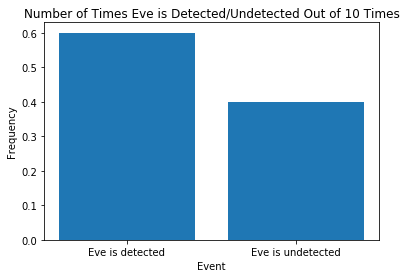

In [ ]:
# Plot
label = ['Eve is detected', 'Eve is undetected']
plt.bar(label,[(float)(count_eve_detect/run_time), (float)(count_eve_undetect/run_time)])
plt.xlabel("Event")
plt.ylabel("Frequency")
plt.title('Number of Times Eve is Detected/Undetected Out of 10 Times')
plt.show()



> **Figure 7: ** Histogram of the Number of Times Eve is Detected or Undetected out of 10 times. From this histogram, Eve is detected 3 out of 5 times. 

Next, we will run this 100 times on the Aer backend and record our results on how many times Eve is detected or undetected. 

In [ ]:
run_time = 100
count_eve_detect = 0
count_eve_undetect = 0
for count in range(run_time):
  if (count%10 == 0):
    print('Progress: ', count, "...", (float)(count*100/run_time), '%')
  
  # Eve intercepts Alice
  q_eve = QuantumRegister(key_size, name='q')
  c_eve = ClassicalRegister(key_size, name='c')
  eve = QuantumCircuit(q_eve, c_eve, name='send')

  # Eve intercepts
  for counter in range(key_size):
    value_key = key[counter]
    value_alice = basis_alice[counter]

    if value_key == '1':
      eve.x(q[counter])
    if value_alice == 'X':
      eve.h(q[counter])
    eve.measure(q_eve[counter],c_eve[counter])
#   eve.draw(output = 'mpl')

  result = execute([eve], backend, shots=1).result()
  counts = result.get_counts(eve)
  result_key = list(result.get_counts(eve).keys())
  result_eve = ''
  result_eve += result_key[0][::-1]

#   print('Key (Same Key from Aer Backend): ', key)
#   print('Eve\'s results: ', result_eve)
  
  # Eve sends her results to Bob
  q_fromeve = QuantumRegister(key_size, name='q')
  c_fromeve = ClassicalRegister(key_size, name='c')
  fromeve = QuantumCircuit(q_fromeve, c_fromeve, name='send')

  for counter in range(key_size):
    value_key = result_eve[counter]
    value_bob = basis_bob[counter]

    if value_key == '1':
      fromeve.x(q_eve[counter])
    if value_bob == 'X':
      fromeve.h(q_eve[counter]) 
    fromeve.measure(q_eve[counter],c_eve[counter])
  fromeve.draw(output = 'mpl')

  # Bob's result from Eve
  result_eavs = ''
  result_eve = execute(fromeve, backend, shots=1).result()
  counts_eve = result_eve.get_counts()
  result_key_eve = list(result_eve.get_counts().keys())
  result_eavs += result_key_eve[0][::-1]

#   print('Bob\'s result when Eve did not intervened: ', result_bob)
#   print('Bob\'s result when Eve intervened: ', result_eavs)
  
  # Compare Basis and Make Secret Key
#   print('Alice\'s key: ', key_alice)
#   print('Size of Alice\'s key: ', key_alice_size)

  key_bob_eavs = ''
  for counter in range(key_size):
    if basis_alice[counter] == basis_bob[counter]:
      key_bob_eavs += result_eavs[counter]
  key_bob_eavs_size = len(key_bob_eavs)
#   print('Bob\'s key: ', key_bob_eavs)
#   print('Size of Bob\'s key: ', key_bob_eavs_size)
  
  # Bob and Alice make parts of their key public
  numBits = key_alice_size - len_mes
  numBitstoCheck = np.random.randint(0,numBits)
  detect = False

  indexes = []
  for i in range(numBitstoCheck):
    indextoCheck = np.random.randint(0,key_alice_size)
    if indextoCheck in indexes:
      i -= 1
    else:
      indexes.append(indextoCheck)

  for i in range(len(indexes)):
    index = indexes[i]
    value_bob = key_bob_eavs
    value_alice = key_alice
    if (value_bob != value_alice):
      detect = True

  if detect:
    count_eve_detect += 1
  else:
    count_eve_undetect += 1

print("Number of times Eve was detected out of 100: ", count_eve_detect)
print("Number of times Eve was undetected out of 100: ", count_eve_undetect)

Progress:  0 ... 0.0 %
Progress:  10 ... 10.0 %
Progress:  20 ... 20.0 %
Progress:  30 ... 30.0 %
Progress:  40 ... 40.0 %
Progress:  50 ... 50.0 %
Progress:  60 ... 60.0 %
Progress:  70 ... 70.0 %
Progress:  80 ... 80.0 %
Progress:  90 ... 90.0 %
Number of times Eve was detected out of 100:  79
Number of times Eve was undetected out of 100:  21


A histogram is shown below of how many times Eve is detected and how many times Eve is undetected out of 100 times. 

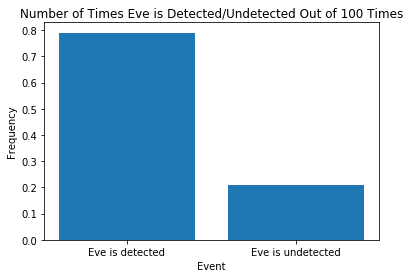

In [ ]:
# Plot
label = ['Eve is detected', 'Eve is undetected']
plt.bar(label,[(float)(count_eve_detect/run_time), (float)(count_eve_undetect/run_time)])
plt.xlabel("Event")
plt.ylabel("Frequency")
plt.title('Number of Times Eve is Detected/Undetected Out of 100 Times')
plt.show()


> **Figure 8: ** Histogram of the Number of Times Eve is Detected or Undetected out of 100 times. From this histogram, Eve is detected around 4 out of 5 times. 

Now, we will run it over 1000 times using the Aer backend to see how many times Eve is undetected and how many times Eve is detected.

In [ ]:
run_time = 1000
count_eve_detect = 0
count_eve_undetect = 0
for count in range(run_time):
  if (count%50 == 0):
    print('Progress: ', count, "...", (float)(count*100/run_time), '%')
  
  # Eve intercepts Alice
  q_eve = QuantumRegister(key_size, name='q')
  c_eve = ClassicalRegister(key_size, name='c')
  eve = QuantumCircuit(q_eve, c_eve, name='send')

  # Eve intercepts
  for counter in range(key_size):
    value_key = key[counter]
    value_alice = basis_alice[counter]

    if value_key == '1':
      eve.x(q[counter])
    if value_alice == 'X':
      eve.h(q[counter])
    eve.measure(q_eve[counter],c_eve[counter])
#   eve.draw(output = 'mpl')

  result = execute([eve], backend, shots=1).result()
  counts = result.get_counts(eve)
  result_key = list(result.get_counts(eve).keys())
  result_eve = ''
  result_eve += result_key[0][::-1]

#   print('Key (Same Key from Aer Backend): ', key)
#   print('Eve\'s results: ', result_eve)
  
  # Eve sends her results to Bob
  q_fromeve = QuantumRegister(key_size, name='q')
  c_fromeve = ClassicalRegister(key_size, name='c')
  fromeve = QuantumCircuit(q_fromeve, c_fromeve, name='send')

  for counter in range(key_size):
    value_key = result_eve[counter]
    value_bob = basis_bob[counter]

    if value_key == '1':
      fromeve.x(q_eve[counter])
    if value_bob == 'X':
      fromeve.h(q_eve[counter]) 
    fromeve.measure(q_eve[counter],c_eve[counter])
  fromeve.draw(output = 'mpl')

  # Bob's result from Eve
  result_eavs = ''
  result_eve = execute(fromeve, backend, shots=1).result()
  counts_eve = result_eve.get_counts()
  result_key_eve = list(result_eve.get_counts().keys())
  result_eavs += result_key_eve[0][::-1]

#   print('Bob\'s result when Eve did not intervened: ', result_bob)
#   print('Bob\'s result when Eve intervened: ', result_eavs)
  
  # Compare Basis and Make Secret Key
#   print('Alice\'s key: ', key_alice)
#   print('Size of Alice\'s key: ', key_alice_size)

  key_bob_eavs = ''
  for counter in range(key_size):
    if basis_alice[counter] == basis_bob[counter]:
      key_bob_eavs += result_eavs[counter]
  key_bob_eavs_size = len(key_bob_eavs)
#   print('Bob\'s key: ', key_bob_eavs)
#   print('Size of Bob\'s key: ', key_bob_eavs_size)
  
  # Bob and Alice make parts of their key public
  numBits = key_alice_size - len_mes
  numBitstoCheck = np.random.randint(0,numBits)
  detect = False

  indexes = []
  for i in range(numBitstoCheck):
    indextoCheck = np.random.randint(0,key_alice_size)
    if indextoCheck in indexes:
      i -= 1
    else:
      indexes.append(indextoCheck)

  for i in range(len(indexes)):
    index = indexes[i]
    value_bob = key_bob_eavs
    value_alice = key_alice
    if (value_bob != value_alice):
      detect = True

  if detect:
    count_eve_detect += 1
  else:
    count_eve_undetect += 1

print("Number of times Eve was detected out of 1000: ", count_eve_detect)
print("Number of times Eve was undetected out of 1000: ", count_eve_undetect)

Progress:  0 ... 0.0 %
Progress:  50 ... 5.0 %
Progress:  100 ... 10.0 %
Progress:  150 ... 15.0 %
Progress:  200 ... 20.0 %
Progress:  250 ... 25.0 %
Progress:  300 ... 30.0 %
Progress:  350 ... 35.0 %
Progress:  400 ... 40.0 %
Progress:  450 ... 45.0 %
Progress:  500 ... 50.0 %
Progress:  550 ... 55.0 %
Progress:  600 ... 60.0 %
Progress:  650 ... 65.0 %
Progress:  700 ... 70.0 %
Progress:  750 ... 75.0 %
Progress:  800 ... 80.0 %
Progress:  850 ... 85.0 %
Progress:  900 ... 90.0 %
Progress:  950 ... 95.0 %
Number of times Eve was detected out of 1000:  849
Number of times Eve was undetected out of 1000:  151


A histogram is shown below of how many times Eve is detected and how many times Eve is undetected out of 1000 times. 

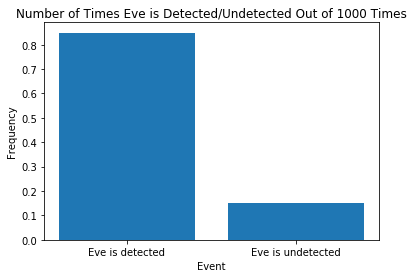

In [ ]:
# Plot
label = ['Eve is detected', 'Eve is undetected']
plt.bar(label,[(float)(count_eve_detect/run_time), (float)(count_eve_undetect/run_time)])
plt.xlabel("Event")
plt.ylabel("Frequency")
plt.title('Number of Times Eve is Detected/Undetected Out of 1000 Times')
plt.show()


> **Figure 9: ** Histogram of the Number of Times Eve is Detected or Undetected out of 1000 times. From this histogram, Eve is detected around 8.5 out of 10 times. 

From the histogram above, we can see that Eve is detected the majority of the time. Some of the reasons why Eve could go undetected is because Alice and Bob did not share enough of their results. Another reason is because there were very few qubits for the keys to work with, and there is a probability that Eve guessed the right basis for all the keys that Alice and Bob shared to the public. We originally start with a key of length 14, however, Alice and Bob throw out qubits when the basis that they measured in do not agree, so the key shrinks. We also need to set aside 3 keys for Alice to encode the message. So, the number of keys that Alice and Bob share is very few. 

Let $n$ be the number of results that Alice and Bob make public. The probability of detecting Eve is $$\text{P[Eve gets caught]} = 1 - \bigg(\frac{3}{4}\bigg)^{n}$$
So the longer the key that Alice and Bob share to the public, the probability of detecting Eve is higher. Therefore, Alice and Bob should share a very long key. However, we are restricted to using the 14 bit quantum computer at IBM.

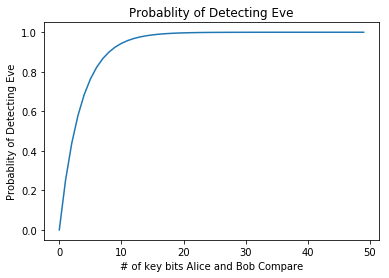

In [ ]:
# Plot of Detecting Eve
x = np.arange(0., 50.0)
y = 1-(3/4)**x
plt.plot(y)
plt.title('Probablity of Detecting Eve')
plt.xlabel('# of key bits Alice and Bob Compare')
plt.ylabel('Probablity of Detecting Eve')
plt.show()



> **Figure 10: ** Probability of Detecting Eve. The probability of detecting Eve is high as the number of key bits that Alice and Bob compare. Because of our restriction of using 14 qubits, Bob and Alice cannot share many of their results. However, from the previous histograms, Eve is detected the majority of the time.

# Introducing Eve the Eavesdropper Using IBM Q 14 at Melbourne


Now, we will submit the same code to the IBM Q 14 at Melbourne. 

## Step 1: Eve Intercepts Alices and Measures the Qubits

In [ ]:
job1 = execute(eve, backend_ibm, shots=1)
job1.status()
result_ibm = job1.result()
counts_ibm = result_ibm.get_counts()
result_key_ibm = list(result_ibm.get_counts(eve).keys())
result_eve_ibm = ''
result_eve_ibm += result_key_ibm[0][::-1]
print('Key (Same Key from IBM Q 14): ', key_ibm)
print('Eve\'s results: ', result_eve_ibm)

Key (Same Key from IBM Q 14):  11111111011101
Eve's results:  10001010111011


## Step 2 and Step 3: Eve Sends the Qubits to Bob Based on Her Results and Bob Measures Them in a Randomly Chosen Basis

In [ ]:
# Eve sends her results to Bob
q_fromeve_ibm = QuantumRegister(key_size, name='q')
c_fromeve_ibm = ClassicalRegister(key_size, name='c')
fromeve_ibm = QuantumCircuit(q_fromeve_ibm, c_fromeve_ibm, name='send')

for counter in range(key_size):
  value_key_ibm = result_eve_ibm[counter]
  value_bob_ibm = basis_bob[counter]
  
  if value_key == '1':
    fromeve_ibm.x(q_eve[counter])
  if value_bob == 'X':
    fromeve_ibm.h(q_eve[counter]) 
  fromeve_ibm.measure(q_eve[counter],c_eve[counter])
fromeve_ibm.draw(output = 'mpl')

# Bob's result from eve
result_eavs_ibm = ''
result_eve_ibm = execute(fromeve_ibm, backend, shots=1).result()
counts_eve_ibm = result_eve_ibm.get_counts()
result_key_eve_ibm = list(result_eve_ibm.get_counts().keys())
result_eavs_ibm += result_key_eve_ibm[0][::-1]

print('Bob\'s result when Eve did not intervened: ', result_bob_ibm)
print('Bob\'s result when Eve intervened: ', result_eavs_ibm)

Bob's result when Eve did not intervened:  11011111111111
Bob's result when Eve intervened:  11111111111111


From above, we can see that the Bob's results differ when Eve intervenes and when Eve does not intervene. 

## Step 4: Alice and Bob Announce the Basis and Create the Key

In [ ]:
# Compare Basis and Make Secret Key
print('Alice\'s key: ', key_alice_ibm)
print('Size of Alice\'s key: ', key_alice_size_ibm)

key_bob_eavs_ibm = ''
for counter in range(key_size):
  if basis_alice[counter] == basis_bob[counter]:
    key_bob_eavs_ibm += result_eavs_ibm[counter]
key_bob_eavs_size_ibm = len(key_bob_eavs_ibm)
print('Bob\'s key: ', key_bob_eavs_ibm)
print('Size of Bob\'s key: ', key_bob_eavs_size_ibm)

Alice's key:  1111110111
Size of Alice's key:  10
Bob's key:  1111111111
Size of Bob's key:  10


We can see that Alice and Bob's key are different, but only by 1 key. If Alice and Bob do not publish the result where they differ, this means that Eve could go undetected.

## Step 5: Alice and Bob Checks for an Eavesdropper

In [ ]:
# Bob and Alice make parts of their key public
numBits = key_alice_size - len_mes
detect = False

indexes = []
for i in range(numBits):
  indextoCheck = np.random.randint(0,key_alice)
  if indextoCheck in indexes:
    i -= 1
  else:
    indexes.append(indextoCheck)

for i in range(numBits):
  index = indexes[i]
  value_bob = key_bob_eavs
  value_alice = key_alice
  if (value_bob != value_alice):
    detect = True

if detect:
  print('Eve has been detected!')
else:
  print('Eve has not been detected!')

Eve has been detected!


From above, we can see that Eve has been detected. Now we will run this 10 times on the IBM Q 14. Running on the IBM Quantum Computer does take a lot of time, therefore, we will only run it 10 times (it takes 20-30 minutes per each run). 

## Repeat Procedure To See If Eve is Undetected or Detected

In [ ]:
run_time = 10
count_eve_detect_ibm = 0
count_eve_undetect_ibm = 0
for count in range(run_time):
  if (count%1 == 0):
    print('Progress: ', count, "...", (float)(count*100/run_time), '%')
  # Eve intercepts Alice
  q_eve_ibm = QuantumRegister(key_size, name='q')
  c_eve_ibm = ClassicalRegister(key_size, name='c')
  eve_ibm = QuantumCircuit(q_eve_ibm, c_eve_ibm, name='send')

  # Eve intercepts
  for counter in range(key_size):
    value_key = key[counter]
    value_alice = basis_alice[counter]

    if value_key == '1':
      eve_ibm.x(q_ibm[counter])
    if value_alice == 'X':
      eve_ibm.h(q_ibm[counter])
    eve_ibm.measure(q_eve_ibm[counter],c_eve[counter])
  eve_ibm.draw(output = 'mpl')

  job1 = execute(eve_ibm, backend_ibm, shots=1)
  job1.status()
  result_ibm = job1.result()
  counts_ibm = result_ibm.get_counts()
  result_key_ibm = list(result_ibm.get_counts(eve_ibm).keys())
  result_eve_ibm = ''
  result_eve_ibm += result_key_ibm[0][::-1]

#   print('Key (Same Key from IBM Q 14): ', key_ibm)
#   print('Eve\'s results: ', result_eve_ibm)
  
  # Eve sends her results to Bob
  q_fromeve_ibm = QuantumRegister(key_size, name='q')
  c_fromeve_ibm = ClassicalRegister(key_size, name='c')
  fromeve_ibm = QuantumCircuit(q_fromeve_ibm, c_fromeve_ibm, name='send')

  for counter in range(key_size):
    value_key_ibm = result_eve_ibm[counter]
    value_bob_ibm = basis_bob[counter]

    if value_key == '1':
      fromeve_ibm.x(q_eve_ibm[counter])
    if value_bob == 'X':
      fromeve_ibm.h(q_eve_ibm[counter]) 
    fromeve_ibm.measure(q_eve_ibm[counter],c_eve_ibm[counter])
  fromeve_ibm.draw(output = 'mpl')

  # Bob's result from eve
  result_eavs_ibm = ''
  result_eve_ibm = execute(fromeve_ibm, backend_ibm, shots=1).result()
  counts_eve_ibm = result_eve_ibm.get_counts()
  result_key_eve_ibm = list(result_eve_ibm.get_counts().keys())
  result_eavs_ibm += result_key_eve_ibm[0][::-1]

#   print('Bob\'s result when Eve did not intervened: ', result_bob_ibm)
#   print('Bob\'s result when Eve intervened: ', result_eavs_ibm)
  
  # Compare Basis and Make Secret Key
#   print('Alice\'s key: ', key_alice_ibm)
#   print('Size of Alice\'s key: ', key_alice_size_ibm)

  key_bob_eavs_ibm = ''
  for counter in range(key_size):
    if basis_alice[counter] == basis_bob[counter]:
      key_bob_eavs_ibm += result_eavs_ibm[counter]
  key_bob_eavs_size_ibm = len(key_bob_eavs_ibm)
#   print('Bob\'s key: ', key_bob_eavs_ibm)
#   print('Size of Bob\'s key: ', key_bob_eavs_size_ibm)

  # Bob and Alice make parts of their key public
  numBits = key_alice_size - len_mes
  numBitstoCheck = np.random.randint(0,numBits)
  detect = False

  indexes = []
  for i in range(numBitstoCheck):
    indextoCheck = np.random.randint(0,key_alice_size)
    if indextoCheck in indexes:
      i -= 1
    else:
      indexes.append(indextoCheck)

  for i in range(len(indexes)):
    index = indexes[i]
    value_bob = key_bob_eavs
    value_alice = key_alice
    if (value_bob != value_alice):
      detect = True
      
  if detect:
    count_eve_detect_ibm += 1
  else:
    count_eve_undetect_ibm += 1



Progress:  0 ... 0.0 %
Progress:  1 ... 10.0 %
Progress:  2 ... 20.0 %
Progress:  3 ... 30.0 %
Progress:  4 ... 40.0 %
Progress:  5 ... 50.0 %
Progress:  6 ... 60.0 %
Progress:  7 ... 70.0 %
Progress:  8 ... 80.0 %
Progress:  9 ... 90.0 %


Number of Times Eve is Detected:  9
Number of Times Eve is Undetected:  1


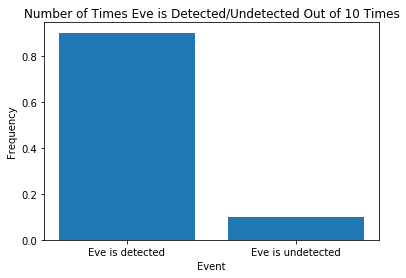

In [ ]:
# Plot
print('Number of Times Eve is Detected: ', count_eve_detect_ibm)
print('Number of Times Eve is Undetected: ', count_eve_undetect_ibm)
label = ['Eve is detected', 'Eve is undetected']
plt.bar(label,[(float)(count_eve_detect_ibm/run_time), (float)(count_eve_undetect_ibm/run_time)])
plt.xlabel("Event")
plt.ylabel("Frequency")
plt.title('Number of Times Eve is Detected/Undetected Out of 10 Times')
plt.show()



> **Figure 13: ** The Number of Times Eve is Detected Out of 10 Times Using the IBM Q 14 Melbourne Quantum Computer. From the histogram, we can see that Eve is detected 9 out of the 10 times. 



We can see that Eve is detected 9 out of the 10 times! However, as we can see from the BB84 Quantum Key Distribution Protocol using the IBM Q 14 quantum computer, the keys between Alice and Bob are different without an eavesdropper. So these results are not accurate. 

# Conclusion

We were able to implement quantum cryptography using the BB84 Quantum Key Distribution using Qiskit. We used a quantum computer simulator, which is the Aer backend, and used the IBM Q 14 Melbourne, IBM's 14 qubit quantum computer. Using the Aer backend, we can see that Alice and Bob are successfully able to communicate. When we ran the same code on IBM's computer, we can see that there are many errors, and Alice and Bob are not able to reliably communicate. Then, we introduced Eve, the eavesdropper. She intercepts Alice's qubit, measures it with a random basis, and prepares a qubit to send to Bob based off her measurements. From the Aer backend, we can see that Eve changes Bob's results when she intervenes. To check for an eavesdropper, Alice and Bob share some of their results that they should agree on. However, the number of keys that Alice and Bob share is very limited. We start with a key of length 14, however, Alice and Bob throw out the results in which they did not use the same basis. They also must save some keys for the message Alice will send. Although Alice and Bob are limited to the amount of keys they share to the public, we can see that Eve is detected the majority of the time. This is then repeated on the IBM Q 14 Melbourne quantum computer. We can see that Eve is detected the majority of the time, however, these results are erroneous because as we can see from the results when Eve did not interfere, the keys Alice and Bob have did not match when Alice encodes the message and Bob decodes the message. These results show that at the current stage of the quantum computer, quantum cryptography is not a reliable form of secret communication. However, some of the results are impressive, and could be improved on once quantum computers are more reliable.

# References 

[1] J. Bergou and M. Hillery, *Introduction to the Theory of Quantum Information Processing* New York, Springer (2013) 

[2] M. Nielsen and I. Chuang, *Quantum Computation and Quantum Information*, Cambridge, Cambridge University Press (2000)

[3] D. Koch, *Introduction to Coding Quantum Algorithms: A Tutorial Series Using Qiskit*, arXiv: 1903.04359 

[4] S. Eidenbenz, *Quantum Algorithm Implementations for Beginners*, arXiv: 1804.03719

[5 ] A.J. Rasmusson and Richard Barney, *Quantum Cryptography: Quantum Key Distribution*, (2018), GitHub Repository, https://github.com/Qiskit/qiskit-tutorials/blob/master/community/awards/teach_me_qiskit_2018/quantum_cryptography_qkd/Quantum_Cryptography2.ipynb

[6] C. Carugo, *Quantum Cryptography*, (2018), GitHub Repository, https://github.com/Qiskit/qiskit-tutorials/blob/master/community/awards/teach_me_qiskit_2018/cryptography/Cryptography.ipynb